<H1 align="Center">PREDICTIONS</H1>

## Table of Contents:
* [Introduction](#Introduction)
* [Imports](#Imports)
* [Raw Data](#RawData)
* [Pre-Processing](#Pre-Processing)
* [Getting All Years Up to 2014](#GettingAllYearsUpto2014)
* [Getting 2012 & 2013](#Getting2012&2013)
* [Getting 2014](#Getting2014)
* [Seperating by State](#SeperatingByState)
* [SVR Regression: Using 2012 & 2013 to Predict 2014](#PR1)
  * [Monthly](#Monthly1)
    
    * [California NO2 AQI](#California1)
    * [California SO2 AQI](#California1.1)
    * [California CO AQI](#California1.2)
    
    * [Georgia NO2 AQI](#Georgia1)
    * [Georgia SO2 AQI](#Georgia1.1)
    * [Georgia CO AQI](#Georgia1.2)
    
    * [Kansas NO2 AQI](#Kansas1)
    * [Kansas SO2 AQI](#Kansas1.1)
    * [Kansas CO AQI](#Kansas1.2)
    
    * [New York NO2 AQI](#NewYork1)
    * [New York SO2 AQI](#NewYork1.1)
    * [New York CO AQI](#NewYork1.2)
    
  * [Daily](#Daily1)
    
    * [California NO2 AQI](#California2)
    * [California SO2 AQI](#California2)
    * [California CO AQI](#California2)
    
    * [Georgia NO2 AQI](#Georgia2)
    * [Georgia SO2 AQI](#Georgia2.1)
    * [Georgia CO AQI](#Georgia2.2)
    
    * [Kansas NO2 AQI](#Kansas2)
    * [Kansas SO2 AQI](#Kansas2.1)
    * [Kansas CO AQI](#Kansas2.2)
    
    * [New York NO2 AQI](#NewYork2)
    * [New York SO2 AQI](#NewYorl2.1)
    * [New York CO AQI](#NewYork2.2)
    
* [SVR Regression: Using All Years to Predict 2014](#PR2)
  * [Daily](#Daily2)
    
    * [California NO2 AQI](#California3)
    * [California SO2 AQI](#California3.1)
    * [California CO AQI](#California3.2)

    * [Georgia NO2 AQI](#Georgia3)
    * [Georgia SO2 AQI](#Georgia3.1)
    * [Georgia CO AQI](#Georgia3.2)
    
    * [Kansas NO2 AQI](#Kansas3)
    * [Kansas SO2 AQI](#Kansas3.1)
    * [Kansas CO AQI](#Kansas3.2)
    
    * [New York NO2 AQI](#NewYork3)
    * [New York SO2 AQI](#NewYorl3.1)
    * [New York CO AQI](#NewYork3.2)

  * [Monthly](#Monthly2)
    
    * [California NO2 AQI](#California4)
    * [California SO2 AQI](#California4.1)
    * [California CO AQI](#California4.2)
    
    * [Georgia NO2 AQI](#Georgia4)
    * [Georgia SO2 AQI](#Georgia4.1)
    * [Georgia CO AQI](#Georgia4.2)
    
    * [Kansas NO2 AQI](#Kansas4)
    * [Kansas SO2 AQI](#Kansas4.1)
    * [Kansas CO AQI](#Kansas4.2)
    
    * [New York NO2 AQI](#NewYork4)
    * [New York SO2 AQI](#NewYorl4.1)
    * [New York CO AQI](#NewYork4.2)
    
* [Conclusion](#Conclusion)

## Introduction <a class="anchor" id="Introduction"></a>
<p>As pollution is a major concern in todays worlds and in our daily lives our groups has decided to do a project on this topic. We have decided to put Data Science to good use and engineer a project that can predict pollution levels. We have chosen to predict NO2, SO2 and CO AQI levels for different states in America. The U.S. AQI is EPA’s index for reporting air quality [7]. An AQI rating of 0-50 is considered Good, 51-100 is Moderate, 101-150 is Unhealthy for Sensitive Groups, 151-200 is Unhealthy, 201-300 is Very Unhealthy and anything over the AQI of 300 is considered hazardous.

This jupyter notebook starts by importing everything that is needed to aid us in making our predictions. Next the data is imported from a csv file and then Data Pre-Processing, Null Value Replacement and Data Filtering takes place. When all the aformentioned is complete SVR Regression is used to predict the AQI levels and the predictions and the actual values are plotted on graphs.</p>

## Imports <a class="anchor" id="Imports"></a>
<p>Listed below are the imports necesarry to carry out this project. These imports allow our notebook to access a Python file or a Python module from the one we are importing from. For example if we wanted to use mathemathical functionalities we would import "math". Below are all the imports that were required to complete our polynomial Regression Predictions [1].</p>

In [45]:
import numpy as np
import pandas as pd
import warnings
import os
import shap
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
shap.initjs()
from sklearn.preprocessing import StandardScaler
#mean squared
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import scipy.sparse as sparse
from sklearn.svm import SVR

## Raw Data <a class="anchor" id="RawData"></a>
<p>Initially we needed a data set which would allow us to predict NO2, SO2 AND CO AQI levels in the USA. We found this data set on kaggle which contained all the data we needed from the year 2000 to 2016 [2]. We started by laoding the file and storing the data from it into a variable called "rawData".</p>

In [33]:
rawData = pd.read_csv('/home/peter/Documents/DSProject/Data.csv')
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [34]:
rawData

Unnamed: 0  State Code  County Code  Site Num  \
0                 0           4           13      3002   
1                 1           4           13      3002   
2                 2           4           13      3002   
3                 3           4           13      3002   
4                 4           4           13      3002   
...             ...         ...          ...       ...   
1746656       24599          56           21       100   
1746657       24600          56           21       100   
1746658       24601          56           21       100   
1746659       24602          56           21       100   
1746660       24603          56           21       100   

                                         Address    State    County  \
0        1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
1        1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
2        1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
3        1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
4        1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
...                                          ...      ...       ...   
1746656    NCore - North Cheyenne Soccer Complex  Wyoming   Laramie   
1746657    NCore - North Cheyenne Soccer Complex  Wyoming   Laramie   
1746658    NCore - North Cheyenne Soccer Complex  Wyoming   Laramie   
1746659    NCore - North Cheyenne Soccer Complex  Wyoming   Laramie   
1746660    NCore - North Cheyenne Soccer Complex  Wyoming   Laramie   

                  City  Date Local          NO2 Units  ...          SO2 Units  \
0              Phoenix  2000-01-01  Parts per billion  ...  Parts per billion   
1              Phoenix  2000-01-01  Parts per billion  ...  Parts per billion   
2              Phoenix  2000-01-01  Parts per billion  ...  Parts per billion   
3              Phoenix  2000-01-01  Parts per billion  ...  Parts per billion   
4              Phoenix  2000-01-02  Parts per billion  ...  Parts per billion   
...                ...         ...                ...  ...                ...   
1746656  Not in a city  2016-03-30  Parts per billion  ...  Parts per billion   
1746657  Not in a city  2016-03-31  Parts per billion  ...  Parts per billion   
1746658  Not in a city  2016-03-31  Parts per billion  ...  Parts per billion   
1746659  Not in a city  2016-03-31  Parts per billion  ...  Parts per billion   
1746660  Not in a city  2016-03-31  Parts per billion  ...  Parts per billion   

         SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour SO2 AQI  \
0        3.000000                9.0                21    13.0   
1        3.000000                9.0                21    13.0   
2        2.975000                6.6                23     NaN   
3        2.975000                6.6                23     NaN   
4        1.958333                3.0                22     4.0   
...           ...                ...               ...     ...   
1746656  0.000000                0.0                 2     NaN   
1746657 -0.022727                0.0                 0     0.0   
1746658 -0.022727                0.0                 0     0.0   
1746659  0.000000                0.0                 5     NaN   
1746660  0.000000                0.0                 5     NaN   

                  CO Units   CO Mean  CO 1st Max Value  CO 1st Max Hour CO AQI  
0        Parts per million  1.145833             4.200               21    NaN  
1        Parts per million  0.878947             2.200               23   25.0  
2        Parts per million  1.145833             4.200               21    NaN  
3        Parts per million  0.878947             2.200               23   25.0  
4        Parts per million  0.850000             1.600               23    NaN  
...                    ...       ...               ...              ...    ...  
1746656  Parts per million  0.091667             0.100                2    1.0  
1746657  Parts per million  0.067714         

## Pre-Processing <a class="anchor" id="Pre-Processing"></a>
<p>Following on from getting the Raw Data we needed to process the data before we started conducting any implementation on it. We did this by dropping any columns we would not need to conduct our prediction analysis [3].</p>

In [35]:
rawData.drop('Unnamed: 0', inplace=True, axis=1)
rawData.drop(columns=["County","NO2 Units","O3 Units","SO2 Units","CO Units","State Code", "County Code","Site Num","Address","City","NO2 1st Max Value","NO2 1st Max Hour","O3 1st Max Value","O3 1st Max Hour","SO2 1st Max Value","SO2 1st Max Hour","CO 1st Max Value","CO 1st Max Hour","NO2 Mean","O3 Mean","SO2 Mean","CO Mean","O3 AQI"], inplace=True)
rawData

State  Date Local  NO2 AQI  SO2 AQI  CO AQI
0        Arizona  2000-01-01       46     13.0     NaN
1        Arizona  2000-01-01       46     13.0    25.0
2        Arizona  2000-01-01       46      NaN     NaN
3        Arizona  2000-01-01       46      NaN    25.0
4        Arizona  2000-01-02       34      4.0     NaN
...          ...         ...      ...      ...     ...
1746656  Wyoming  2016-03-30        1      NaN     1.0
1746657  Wyoming  2016-03-31        1      0.0     NaN
1746658  Wyoming  2016-03-31        1      0.0     1.0
1746659  Wyoming  2016-03-31        1      NaN     NaN
1746660  Wyoming  2016-03-31        1      NaN     1.0

[1746661 rows x 5 columns]

## Null Value Replacement <a class="anchor" id="NullValueReplacement"></a>
<p>After the Data Pre-Processing was complete we needed to replace the remaining null values in the data set. Null values are incorrect values in a data set where a "null" or a 0 was placed due to the actual value being missing. These values were replaced in our data set by replacing these values by the avarage value [4].</p>

In [36]:
rawData['SO2 AQI'].mean()

7.115944533587257

In [37]:
rawData['CO AQI'].mean()

5.996594674684944

In [38]:
rawData['NO2 AQI'].mean()

23.89821665451968

In [39]:
rawData['SO2 AQI'] = rawData['SO2 AQI'].fillna(7.115944533587257)
rawData['CO AQI'] = rawData['CO AQI'].fillna(5.996594674684944)
rawData['NO2 AQI'] = rawData['NO2 AQI'].fillna(23.89821665451968)

## Getting All Years Up to 2014 <a class="anchor" id="GettingAllYearsUpto2014"></a>
<p>Next we seperated our data set and saved it into a new variable. We got all the years from 2000 to 2014.</p>

In [40]:
allYears = rawData
startDate="2000-01-01"
endDate="2013-12-31"
afterStartDate=allYears["Date Local"] >= startDate
beforeEndDate=allYears["Date Local"] <= endDate
betweenDate=afterStartDate & beforeEndDate
allYears = allYears.loc[betweenDate]
allYears

State  Date Local  NO2 AQI    SO2 AQI     CO AQI
0        Arizona  2000-01-01       46  13.000000   5.996595
1        Arizona  2000-01-01       46  13.000000  25.000000
2        Arizona  2000-01-01       46   7.115945   5.996595
3        Arizona  2000-01-01       46   7.115945  25.000000
4        Arizona  2000-01-02       34   4.000000   5.996595
...          ...         ...      ...        ...        ...
1464407  Wyoming  2013-12-30       13   7.115945   1.000000
1464408  Wyoming  2013-12-31        1   0.000000   5.996595
1464409  Wyoming  2013-12-31        1   0.000000   1.000000
1464410  Wyoming  2013-12-31        1   7.115945   5.996595
1464411  Wyoming  2013-12-31        1   7.115945   1.000000

[1464412 rows x 5 columns]

## Getting 2012 & 2013 <a class="anchor" id="Getting2012&2013"></a>
<p>Next we seperated our data set and saved it into a new variable. We got all the years 2012 and 2013.</p>

In [41]:
years12_13daily = allYears
startDate="2012-01-01"
endDate="2013-12-31"
afterStartDate=allYears["Date Local"] >= startDate
beforeEndDate=allYears["Date Local"] <= endDate
betweenDate=afterStartDate & beforeEndDate
years12_13daily = allYears.loc[betweenDate]
years12_13daily

State  Date Local  NO2 AQI   SO2 AQI     CO AQI
1201630  Arizona  2012-01-01       31  7.000000   5.996595
1201631  Arizona  2012-01-01       31  7.000000  31.000000
1201632  Arizona  2012-01-01       31  7.115945   5.996595
1201633  Arizona  2012-01-01       31  7.115945  31.000000
1201634  Arizona  2012-01-02       36  3.000000   5.996595
...          ...         ...      ...       ...        ...
1464407  Wyoming  2013-12-30       13  7.115945   1.000000
1464408  Wyoming  2013-12-31        1  0.000000   5.996595
1464409  Wyoming  2013-12-31        1  0.000000   1.000000
1464410  Wyoming  2013-12-31        1  7.115945   5.996595
1464411  Wyoming  2013-12-31        1  7.115945   1.000000

[262782 rows x 5 columns]

## Getting 2014 <a class="anchor" id="Getting2014"></a>
<p>Next we seperated our data set and saved it into a new variable. We got all the year from 2014.</p>

In [42]:
year14 = rawData

In [43]:
startDate="2014-01-01"
endDate="2014-12-31"
afterStartDate=year14["Date Local"] >= startDate
beforeEndDate=year14["Date Local"] <= endDate
betweenDate=afterStartDate & beforeEndDate
year14 = year14.loc[betweenDate]
year14

State  Date Local  NO2 AQI   SO2 AQI    CO AQI
1464412  Alabama  2014-01-01       44  3.000000  5.996595
1464413  Alabama  2014-01-01       44  3.000000  6.000000
1464414  Alabama  2014-01-01       44  7.115945  5.996595
1464415  Alabama  2014-01-01       44  7.115945  6.000000
1464416  Alabama  2014-01-02        7  0.000000  5.996595
...          ...         ...      ...       ...       ...
1595996  Wyoming  2014-12-30       27  7.115945  2.000000
1595997  Wyoming  2014-12-31       11  0.000000  5.996595
1595998  Wyoming  2014-12-31       11  0.000000  2.000000
1595999  Wyoming  2014-12-31       11  7.115945  5.996595
1596000  Wyoming  2014-12-31       11  7.115945  2.000000

[131589 rows x 5 columns]

## SVR Regression: Using 2012 & 2013 to Predict 2014<a class="anchor" id="PR1"></a>
<p></p>

### Monthly <a class="anchor" id="Monthly1">
<p></p>

#### California NO2 AQI  <a class="anchor" id="California1">
<p>Bellow is the allgorithim used to predict all the states. The only things that Change are the selected states and the data sets are seperated into daily values and monthly values.</p>

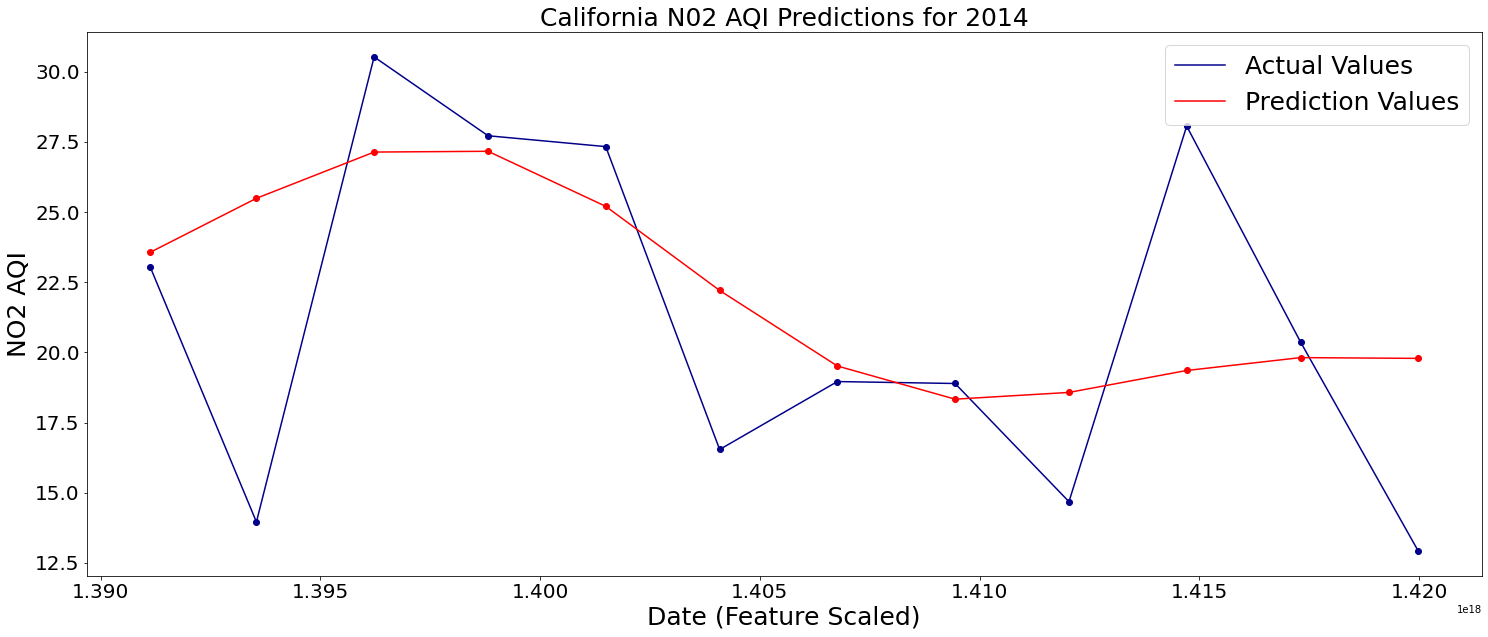

In [78]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "California"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' N02 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### California SO2 AQI  <a class="anchor" id="California1.1">

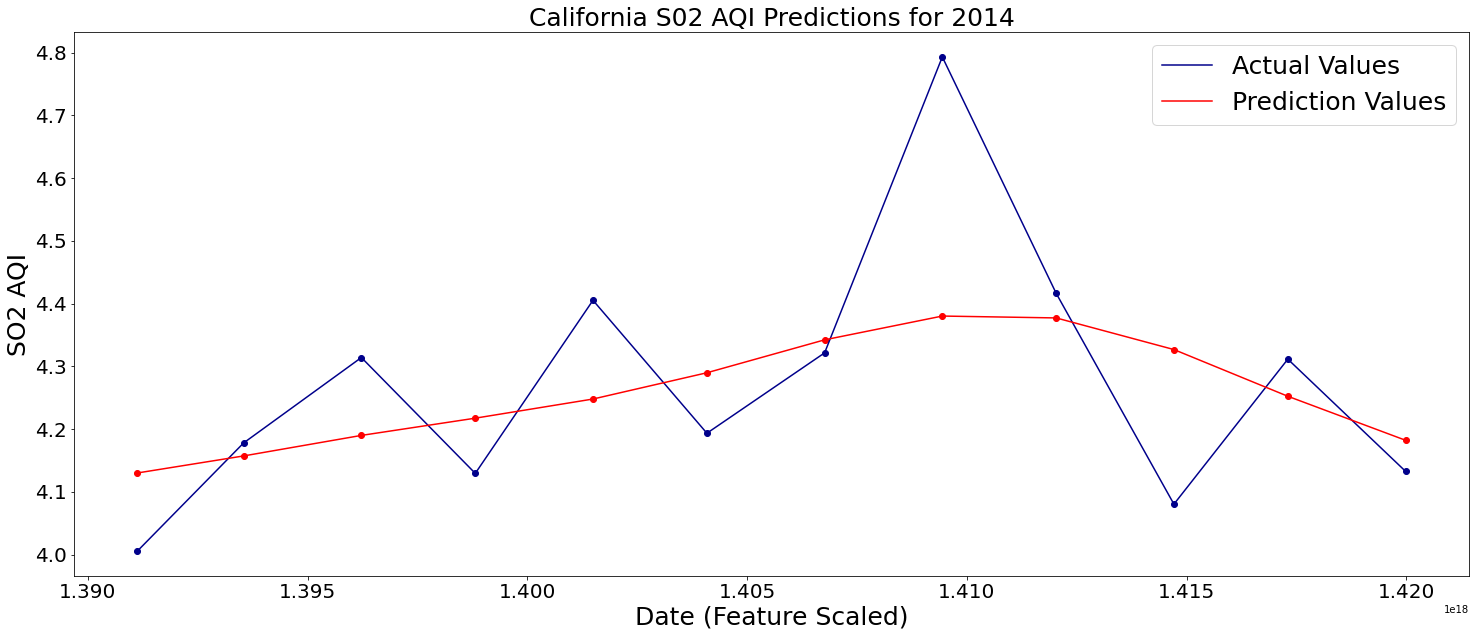

In [94]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "California"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' S02 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### California CO AQI  <a class="anchor" id="California1.2">

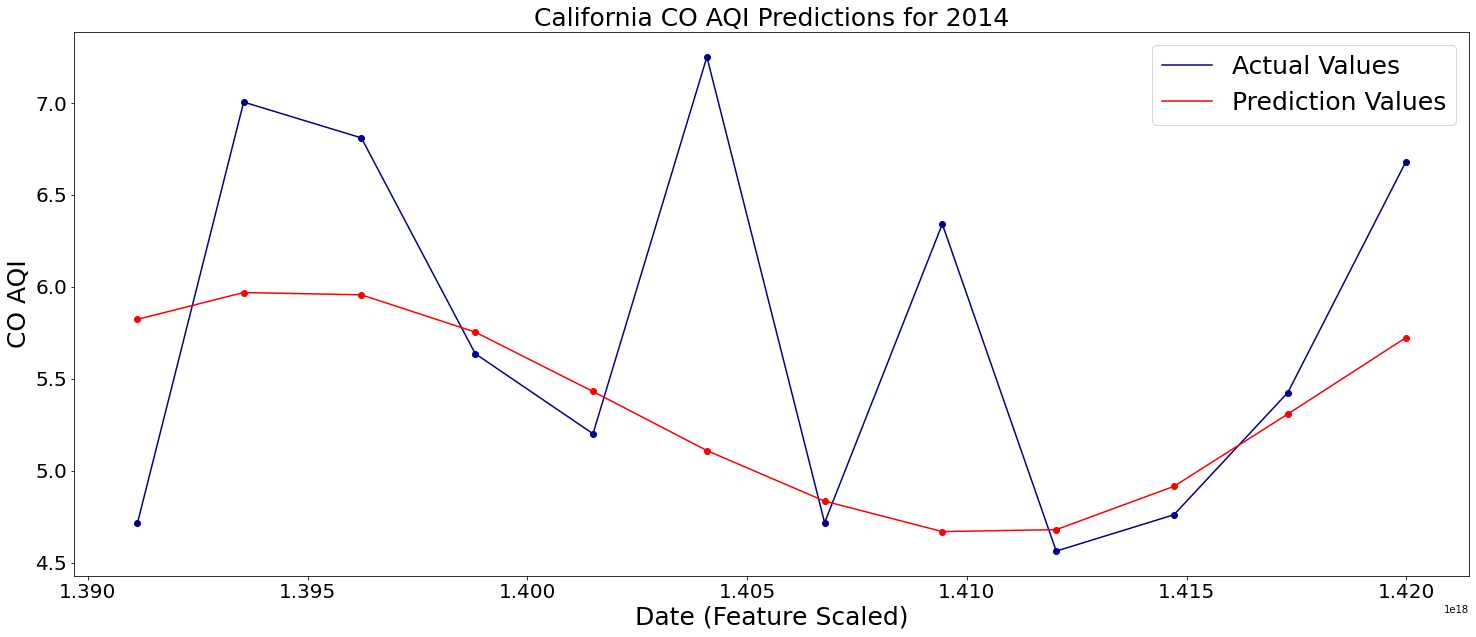

In [117]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "California"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia NO2 AQI <a class="anchor" id="Georgia1">

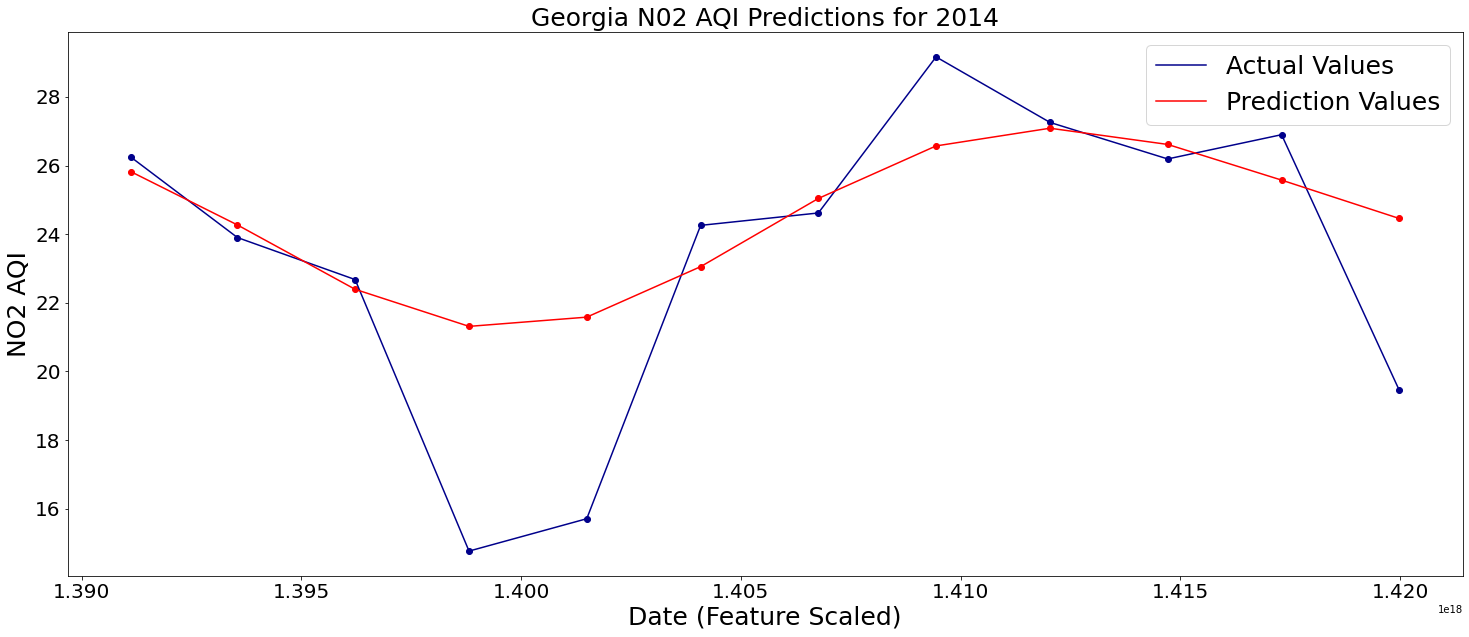

In [81]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Georgia"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' N02 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia SO2 AQI <a class="anchor" id="Georgia1.1">

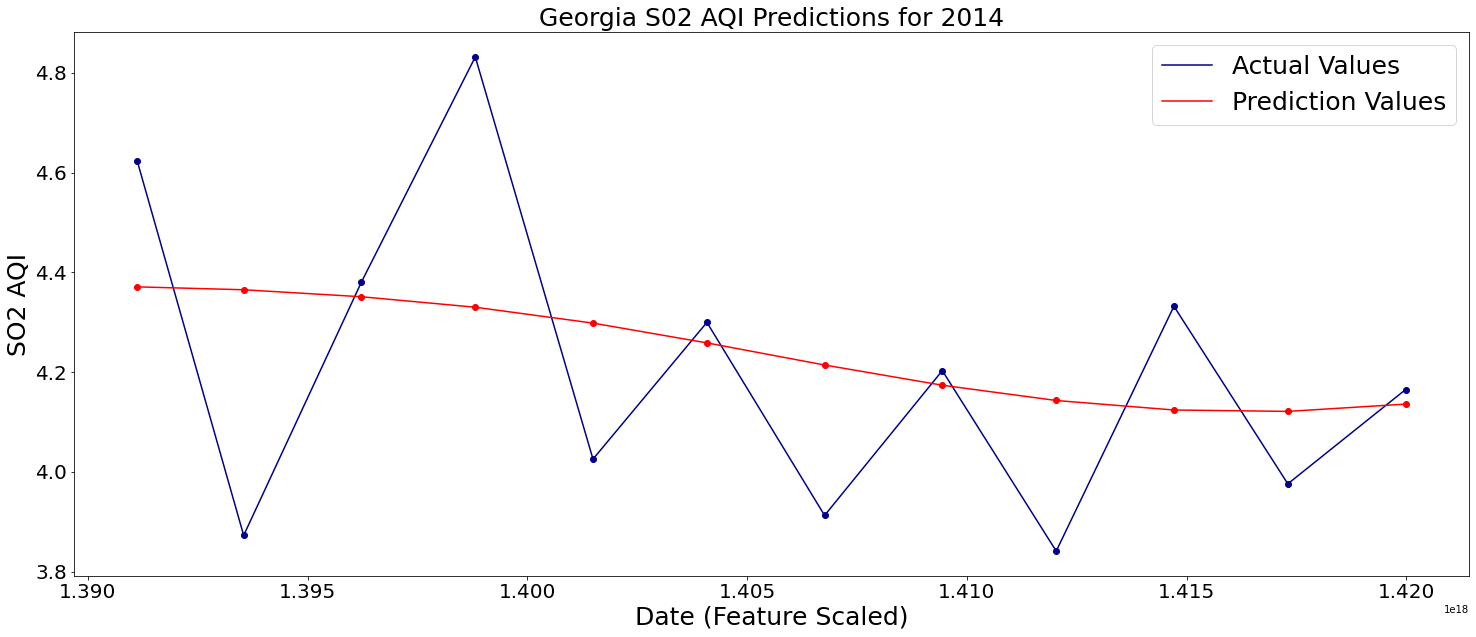

In [95]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Georgia"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' S02 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia CO AQI <a class="anchor" id="Georgia1.2">

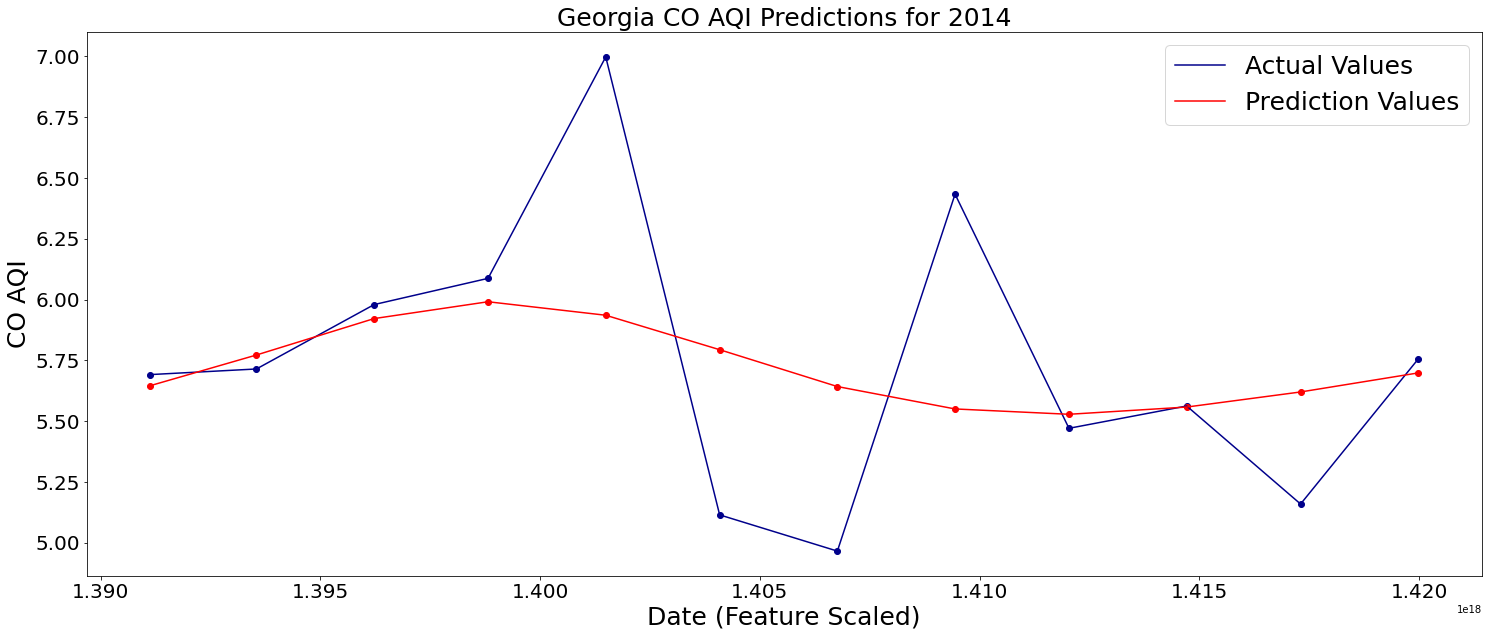

In [118]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Georgia"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas NO2 AQI <a class="anchor" id="Kansas1">

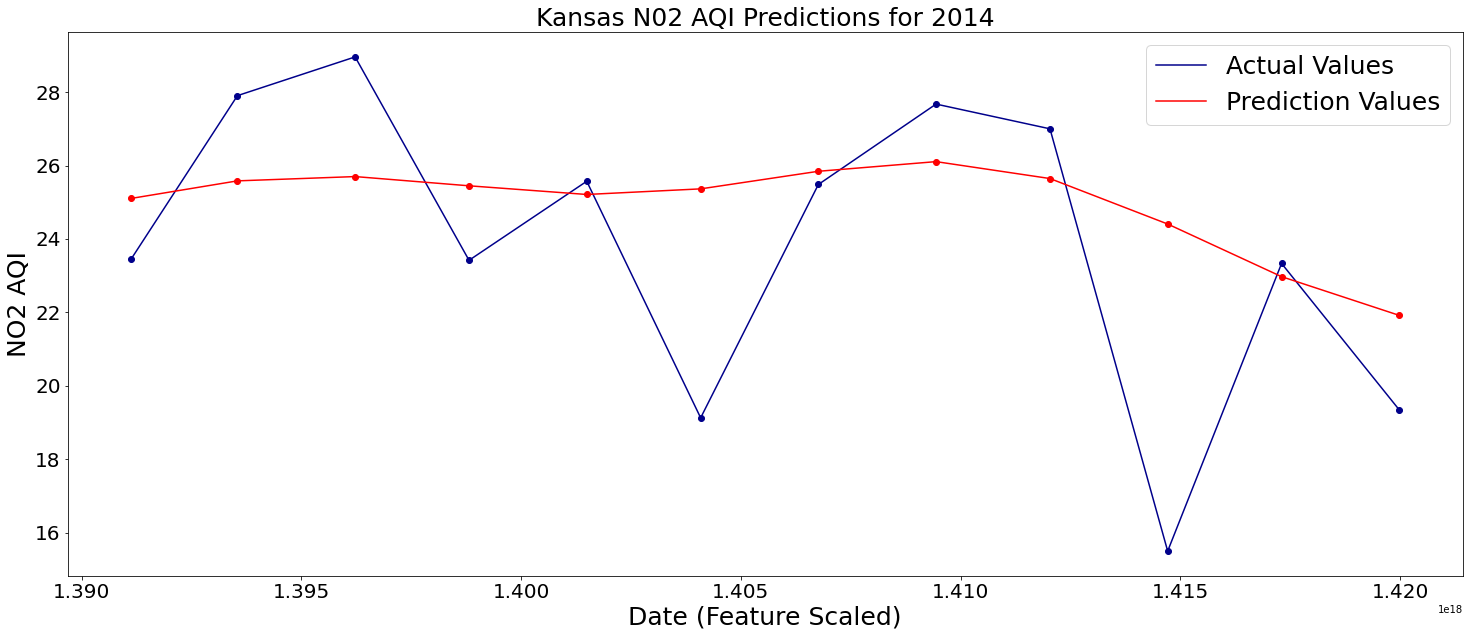

In [82]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Kansas"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' N02 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas SO2 AQI<a class="anchor" id="Kansas1.1">

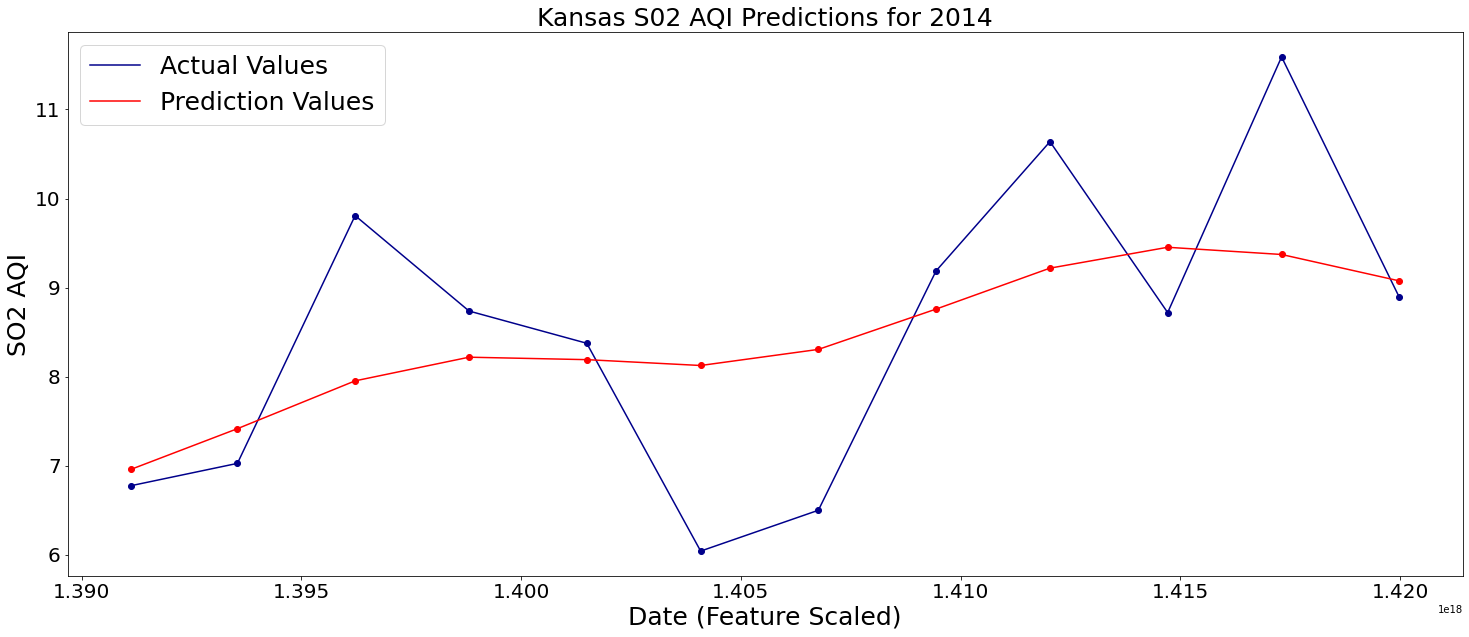

In [96]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Kansas"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' S02 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas CO AQI<a class="anchor" id="Kansas1.2">

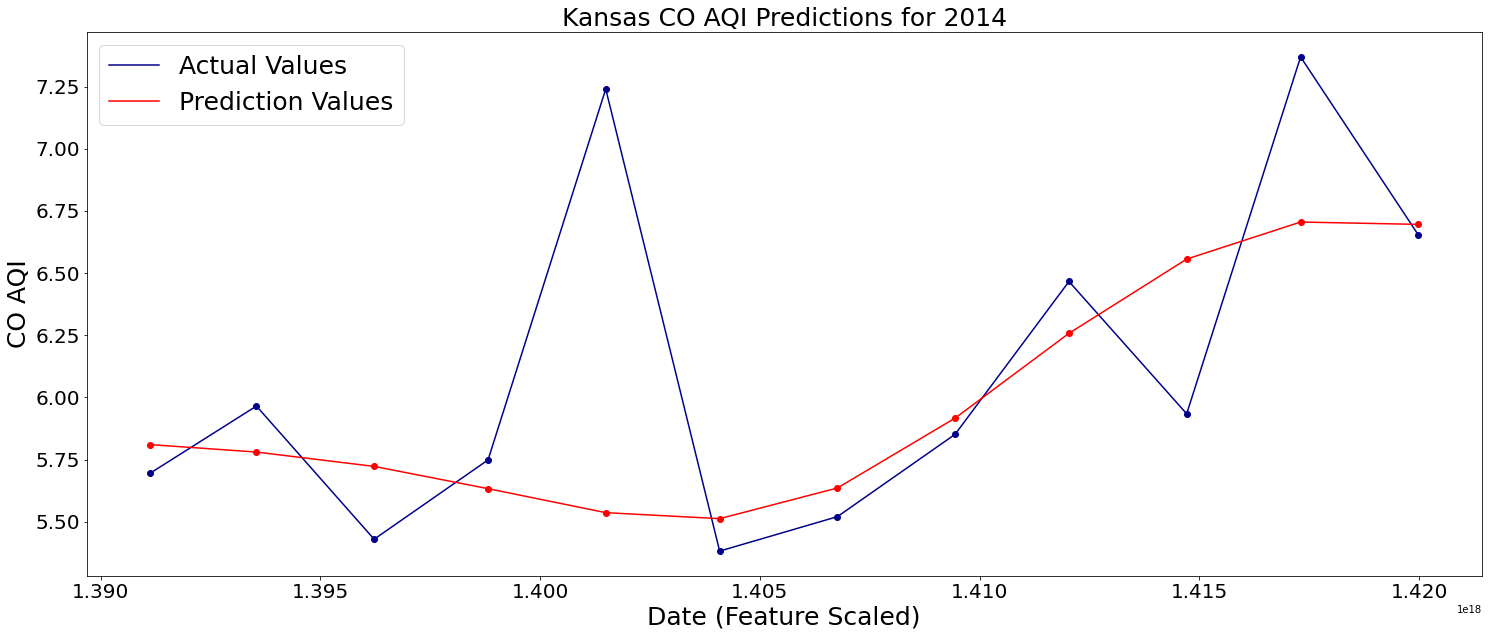

In [119]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Kansas"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York NO2 AQI <a class="anchor" id="NewYork1">

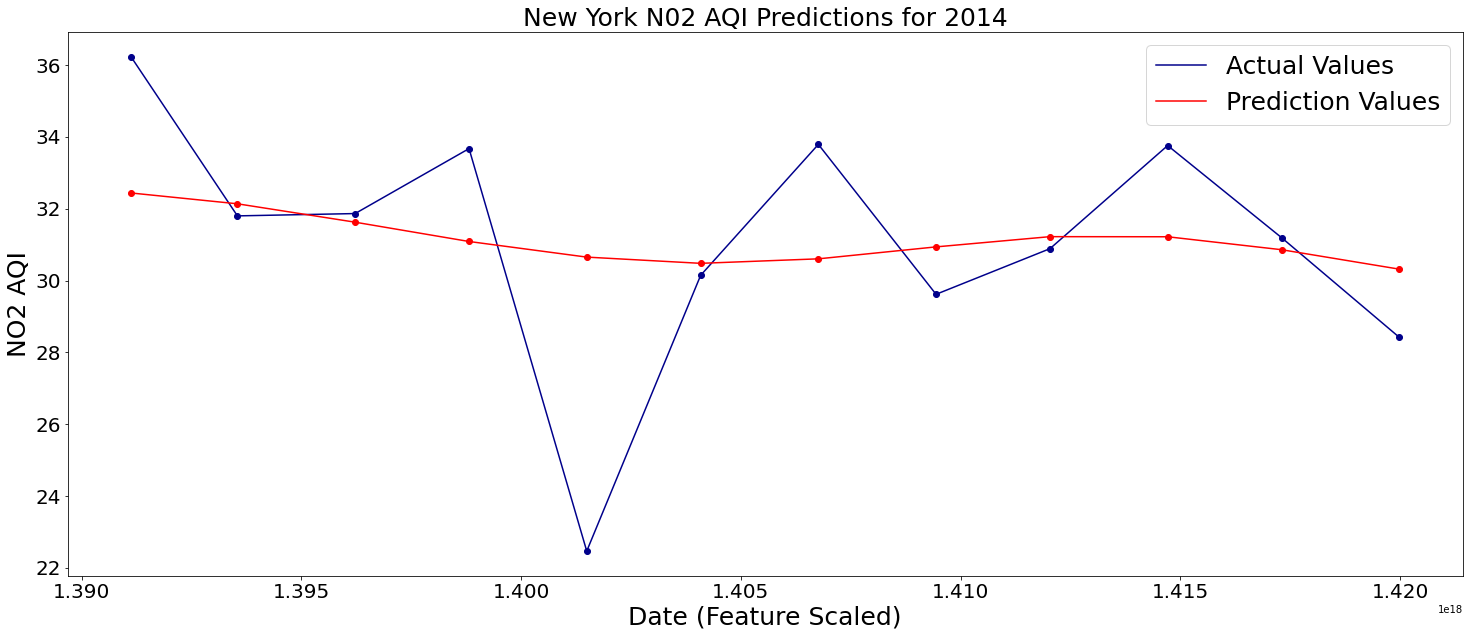

In [83]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "New York"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' N02 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York SO2 AQI <a class="anchor" id="NewYork1.1">

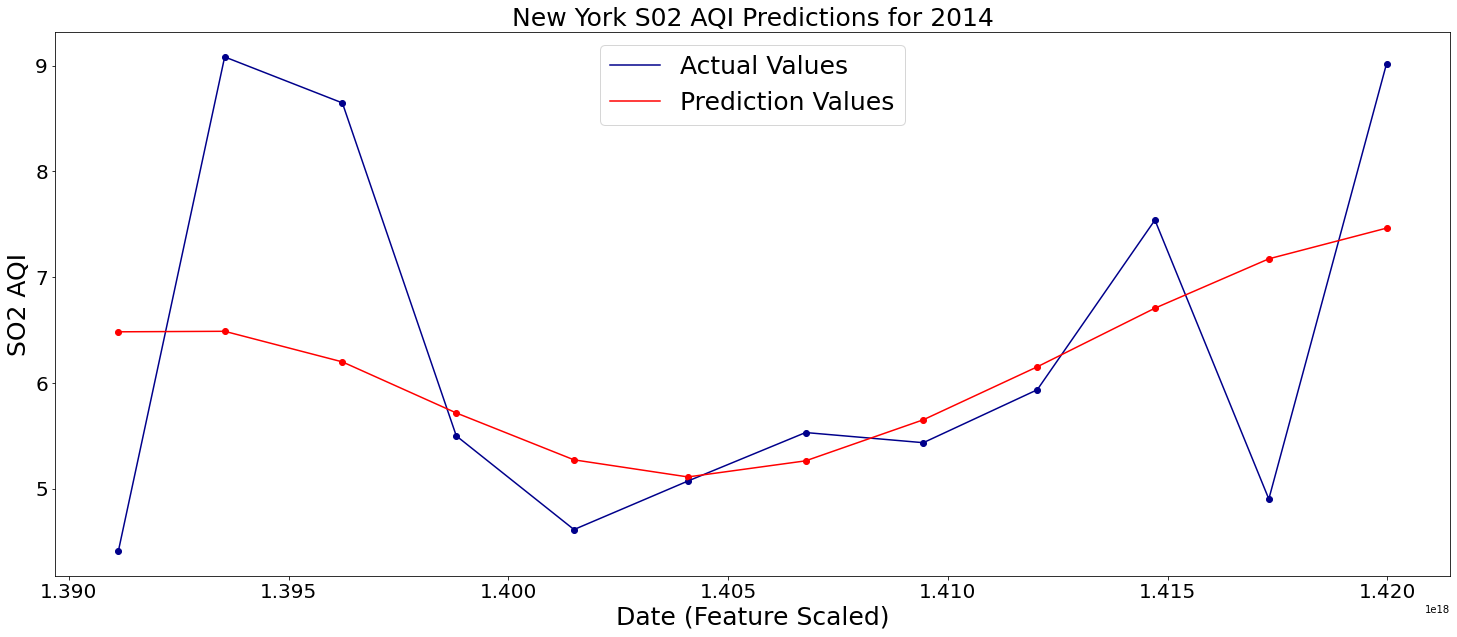

In [97]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "New York"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' S02 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York CO AQI <a class="anchor" id="NewYork1.2">

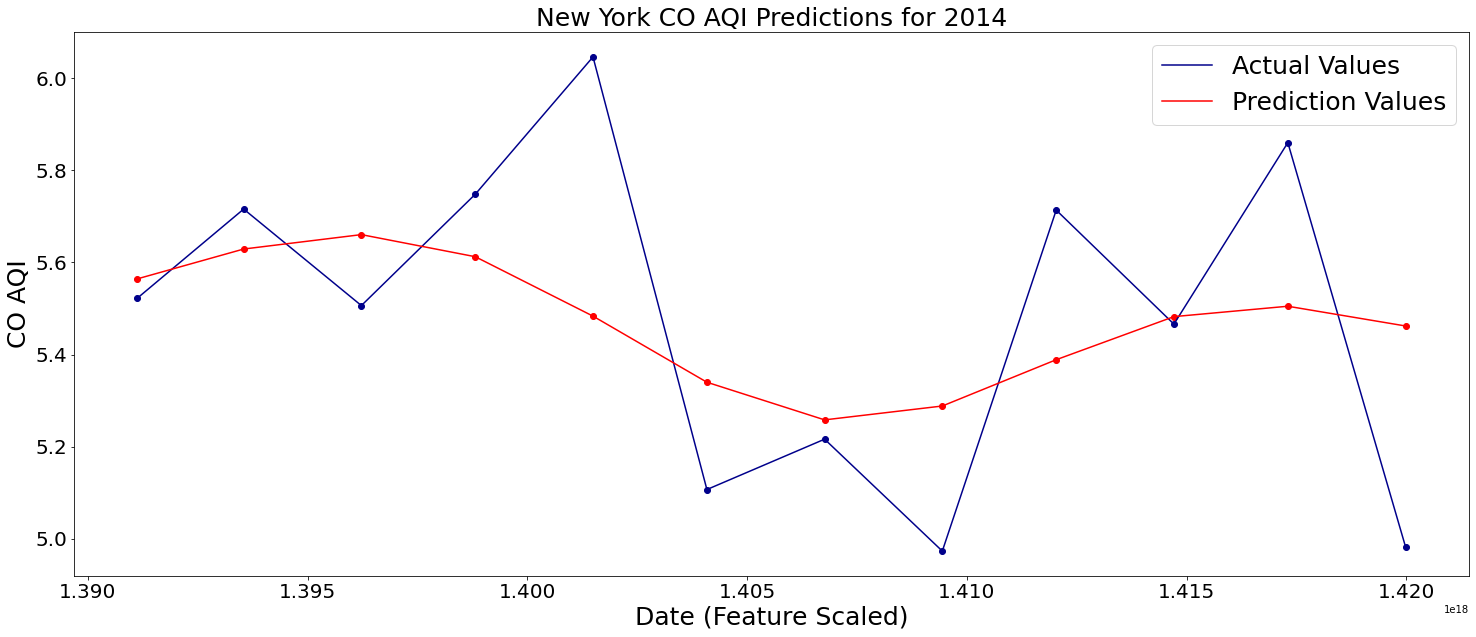

In [120]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "New York"

#All the data for that state is saved into a variable
State = years12_13daily['State'] == Selected
State = years12_13daily[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.5)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Feature Scaled)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Daily <a class="anchor" id="Daily1">
<p></p>

#### California NO2 AQI<a class="anchor" id="California2">

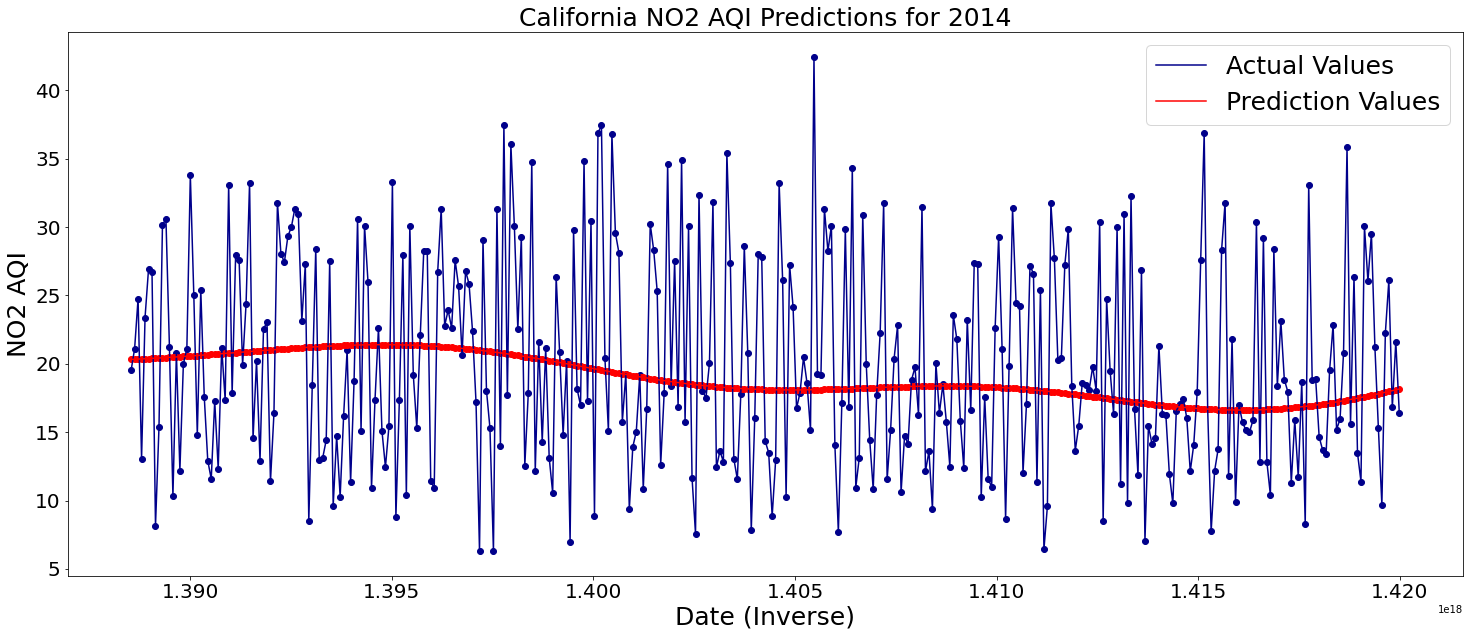

In [121]:
warnings.filterwarnings('ignore')

Selected = "California"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.499316)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' NO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### California SO2 AQI<a class="anchor" id="California2.1">

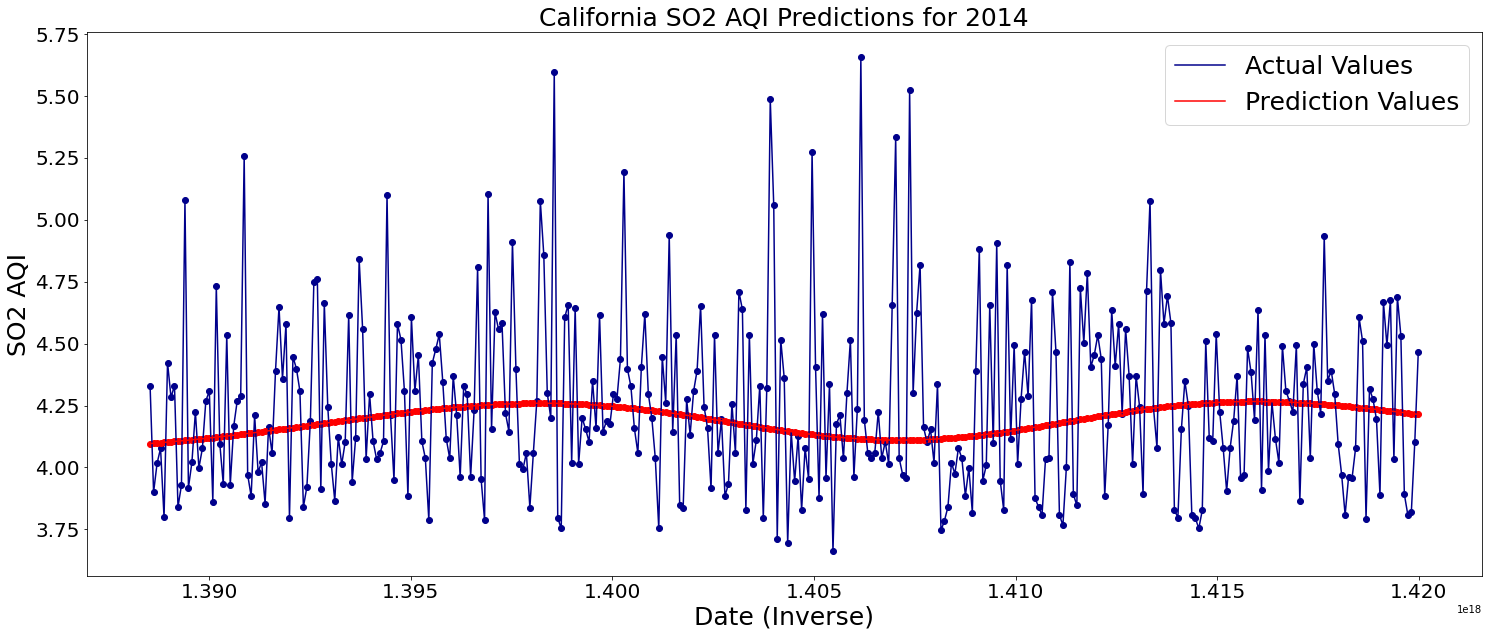

In [102]:
warnings.filterwarnings('ignore')

Selected = "California"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.499316)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### California CO AQI<a class="anchor" id="California2.1">

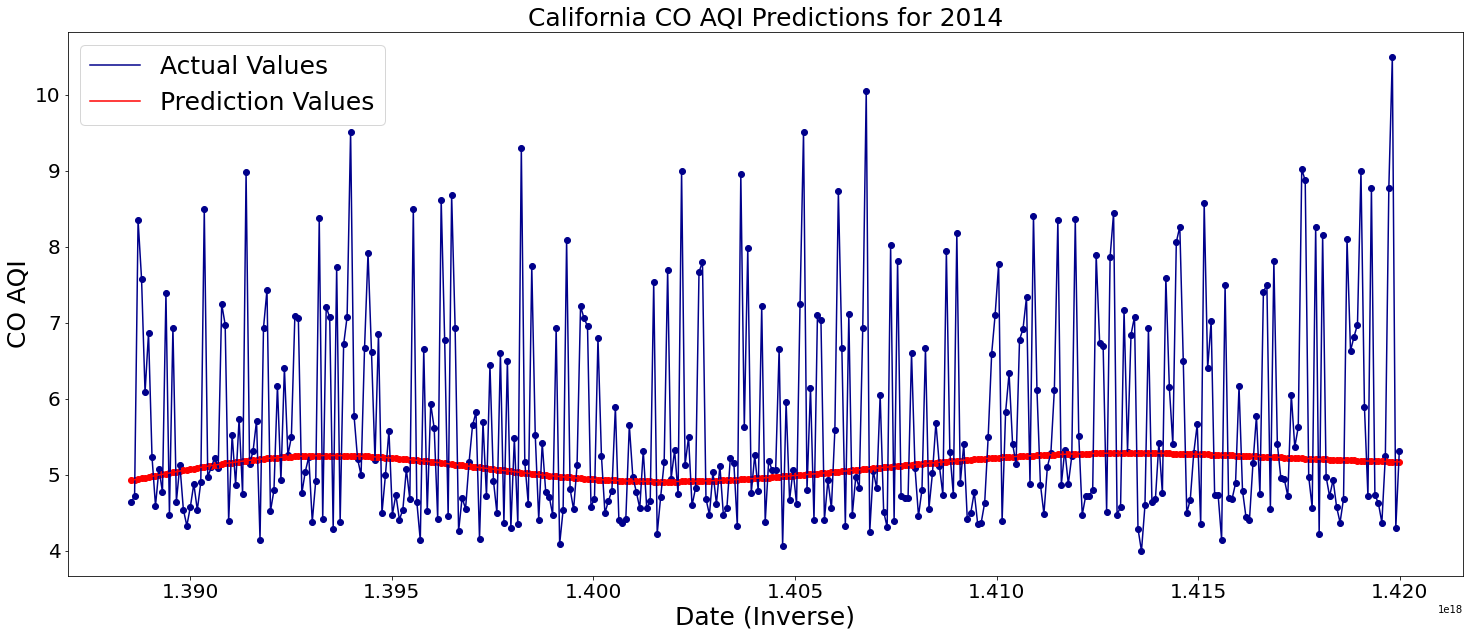

In [108]:
warnings.filterwarnings('ignore')

Selected = "California"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.499316)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia NO2 AQI <a class="anchor" id="Georgia2">

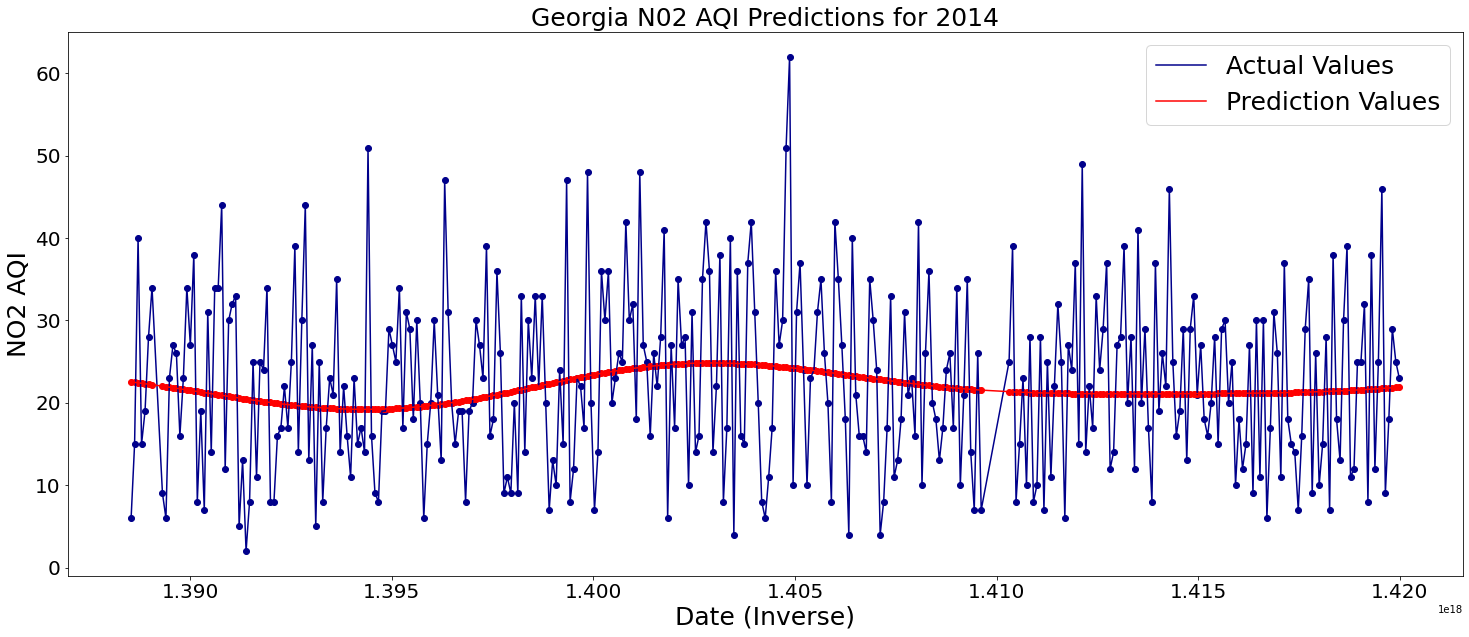

In [84]:
warnings.filterwarnings('ignore')

Selected = "Georgia"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.499316)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' N02 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia SO2 AQI <a class="anchor" id="Georgia2.1">

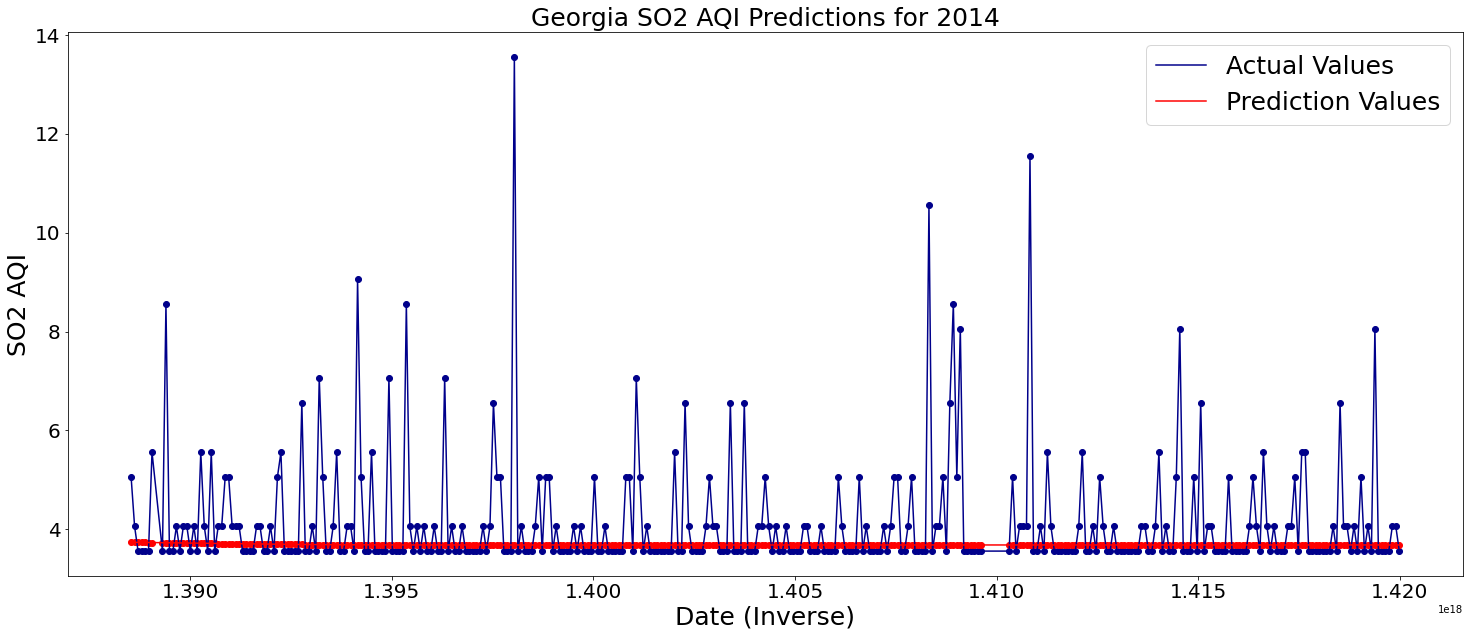

In [103]:
warnings.filterwarnings('ignore')

Selected = "Georgia"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.499316)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia CO AQI <a class="anchor" id="Georgia2.2">

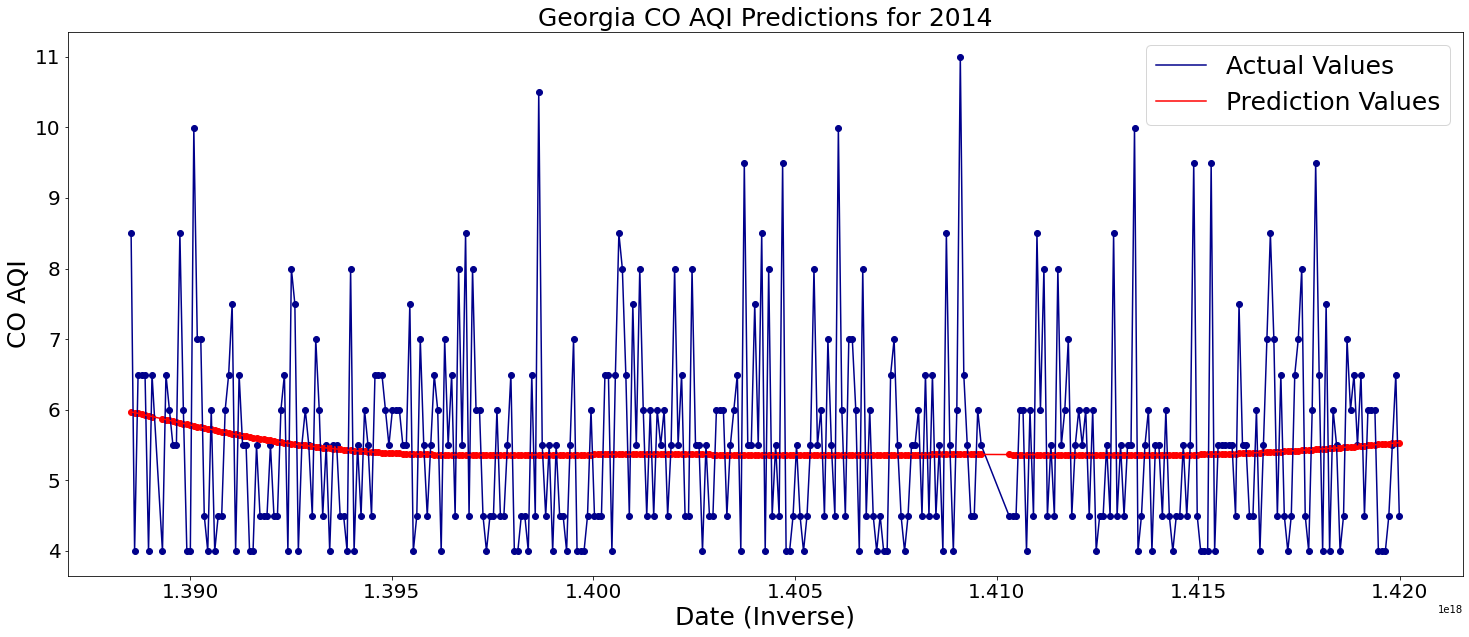

In [114]:
warnings.filterwarnings('ignore')

Selected = "Georgia"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.499316)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas NO2 AQI<a class="anchor" id="Kansas2">

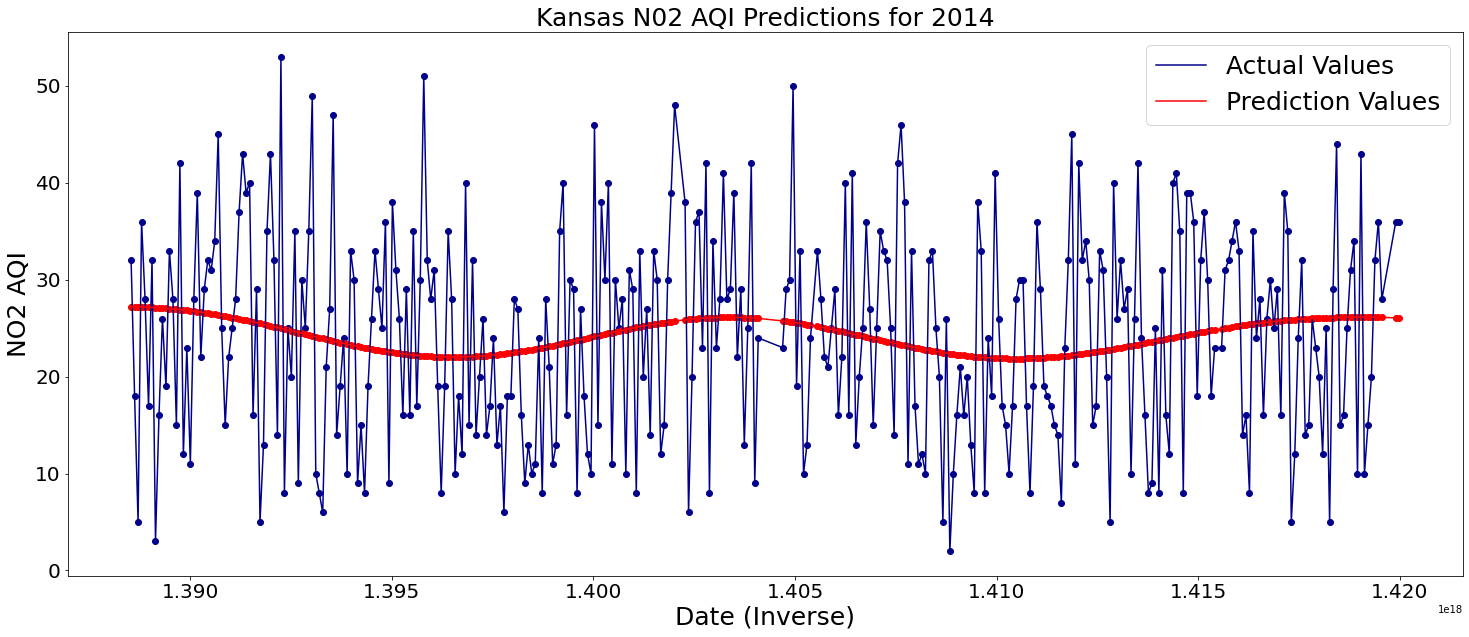

In [88]:
warnings.filterwarnings('ignore')

Selected = "Kansas"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.542372)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' N02 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas SO2 AQI<a class="anchor" id="Kansas2.1">

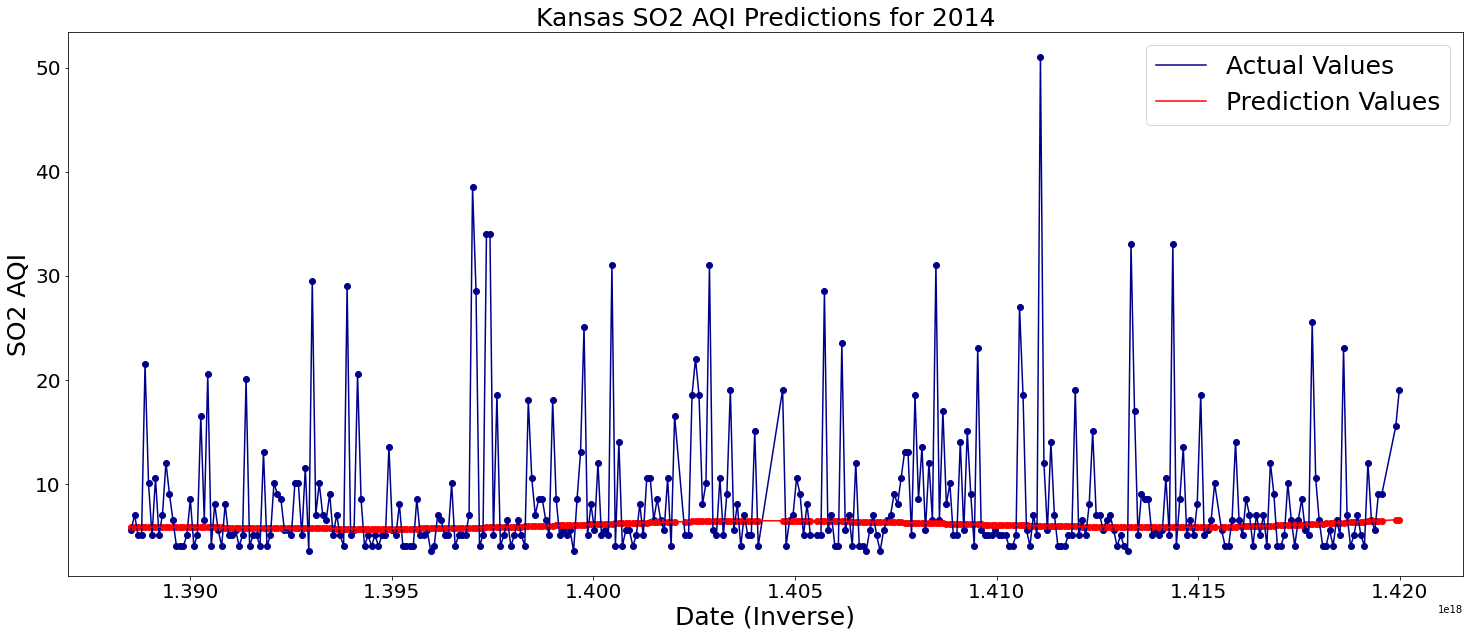

In [105]:
warnings.filterwarnings('ignore')

Selected = "Kansas"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.542372)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas CO AQI<a class="anchor" id="Kansas2.2">

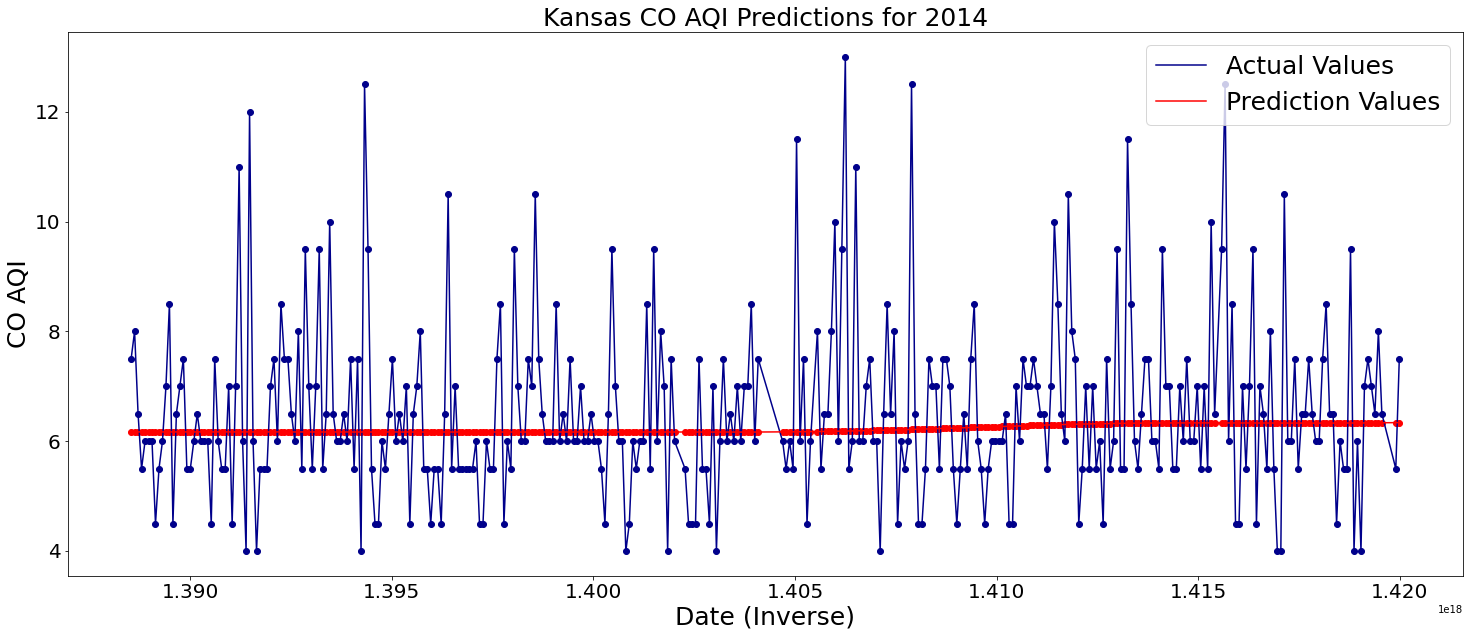

In [122]:
warnings.filterwarnings('ignore')

Selected = "Kansas"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.542372)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York NO2 AQI<a class="anchor" id="NewYork2">

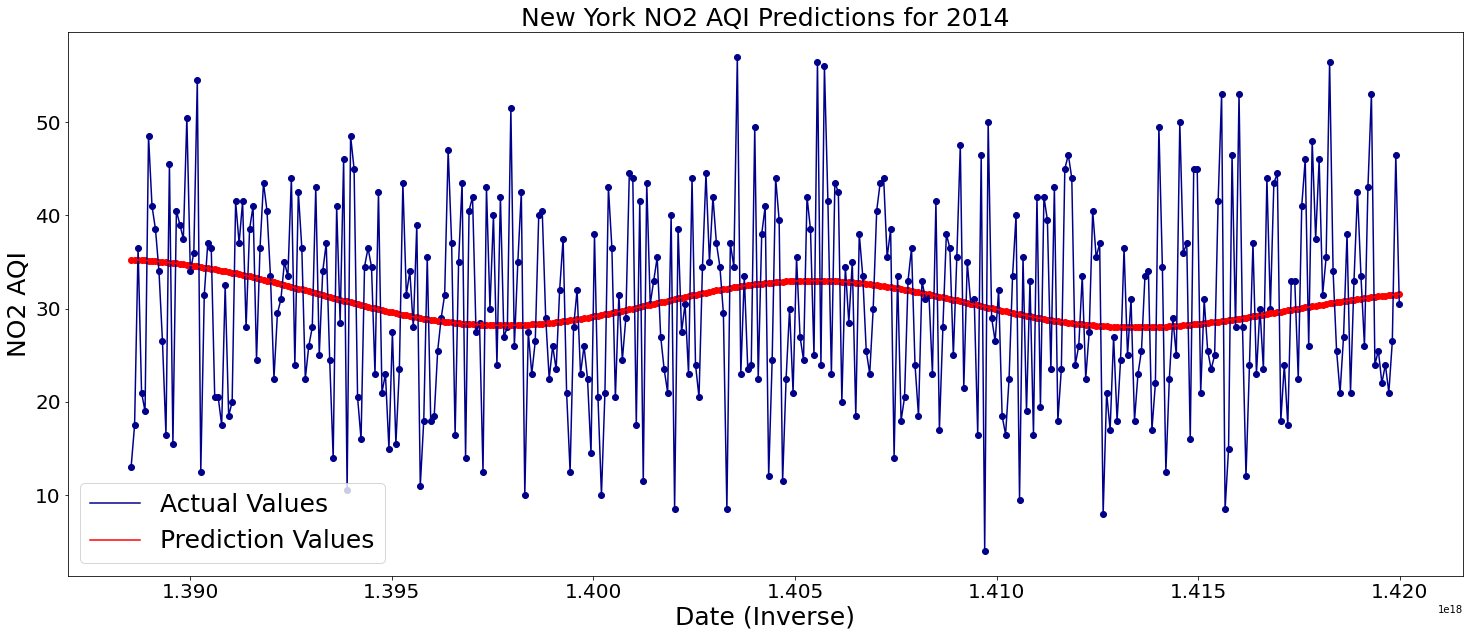

In [123]:
warnings.filterwarnings('ignore')

Selected = "New York"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.49931)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' NO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York SO2 AQI<a class="anchor" id="NewYork2.1">

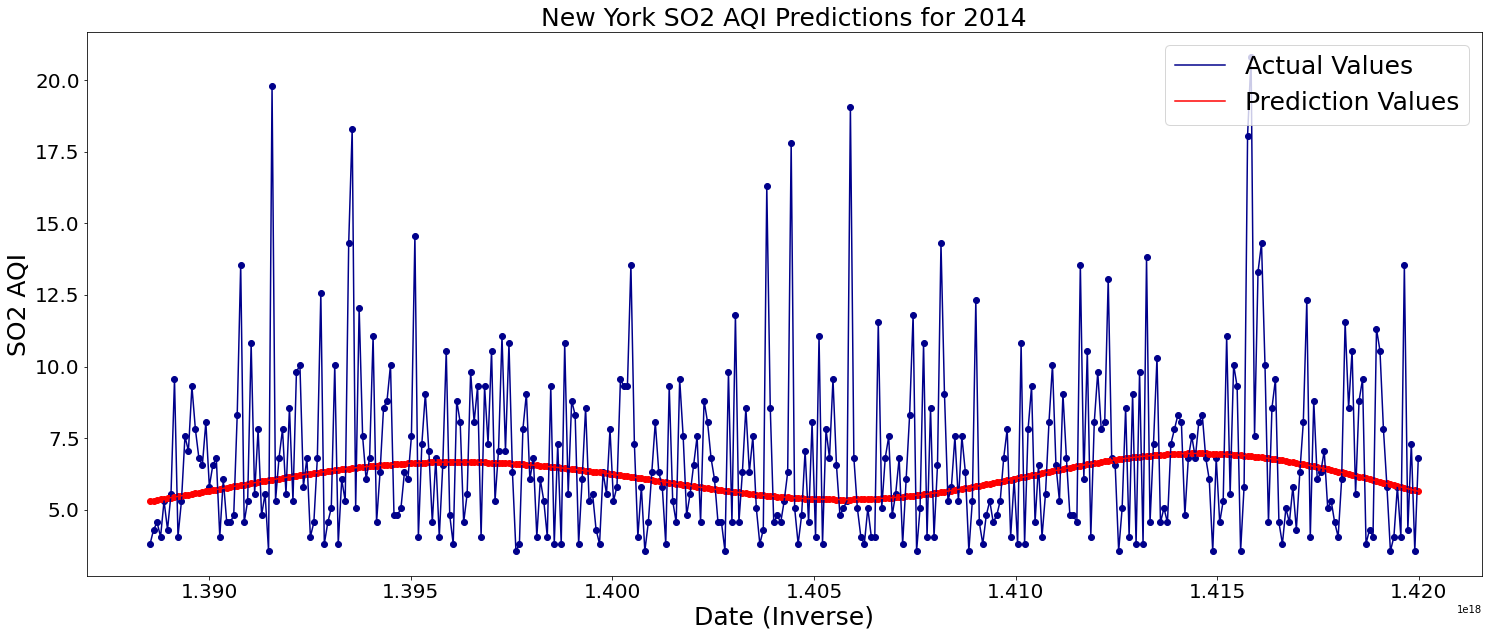

In [107]:
warnings.filterwarnings('ignore')

Selected = "New York"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.499316)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York CO AQI<a class="anchor" id="NewYork2.2">

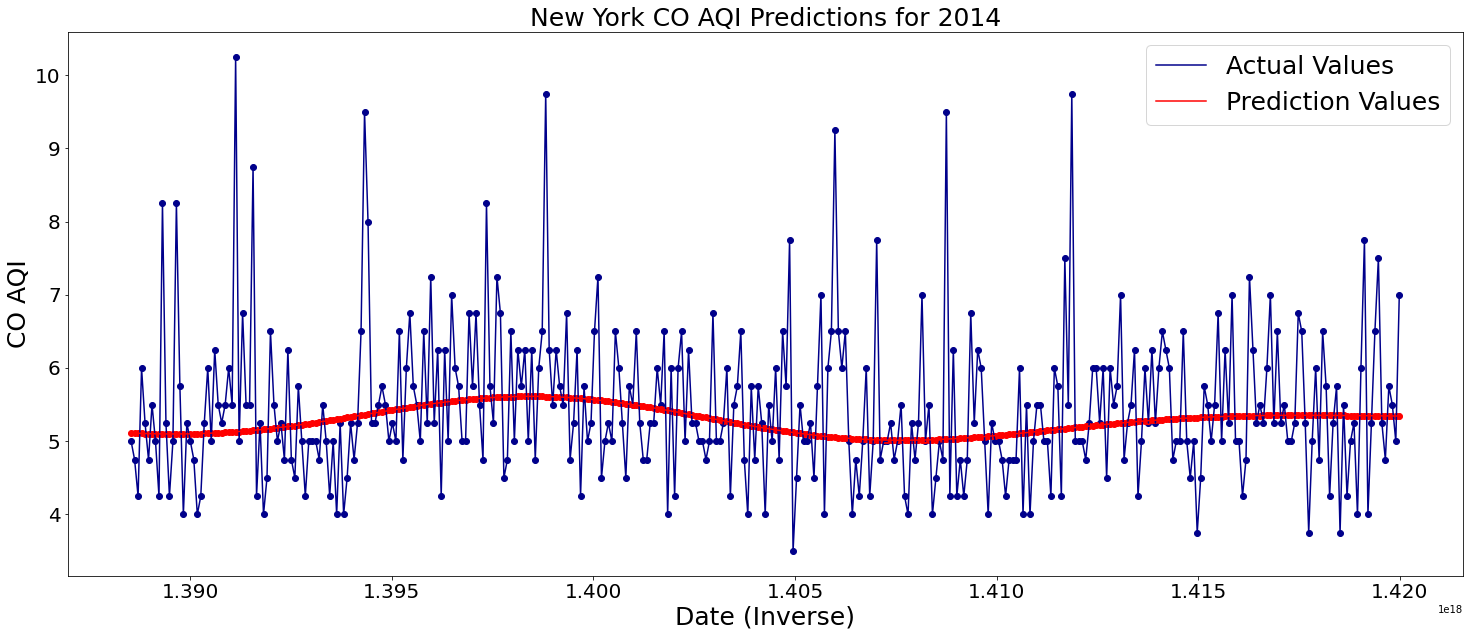

In [115]:
warnings.filterwarnings('ignore')

Selected = "New York"

State = years12_13daily['State'] == Selected
State = years12_13daily[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.499316)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

## Polynomial Regression: Using All Years to Predict 2014<a class="anchor" id="PR2"></a>
<p></p>

### Daily <a class="anchor" id="Daily2">
<p></p>

#### California NO2 AQI <a class="anchor" id="California3">

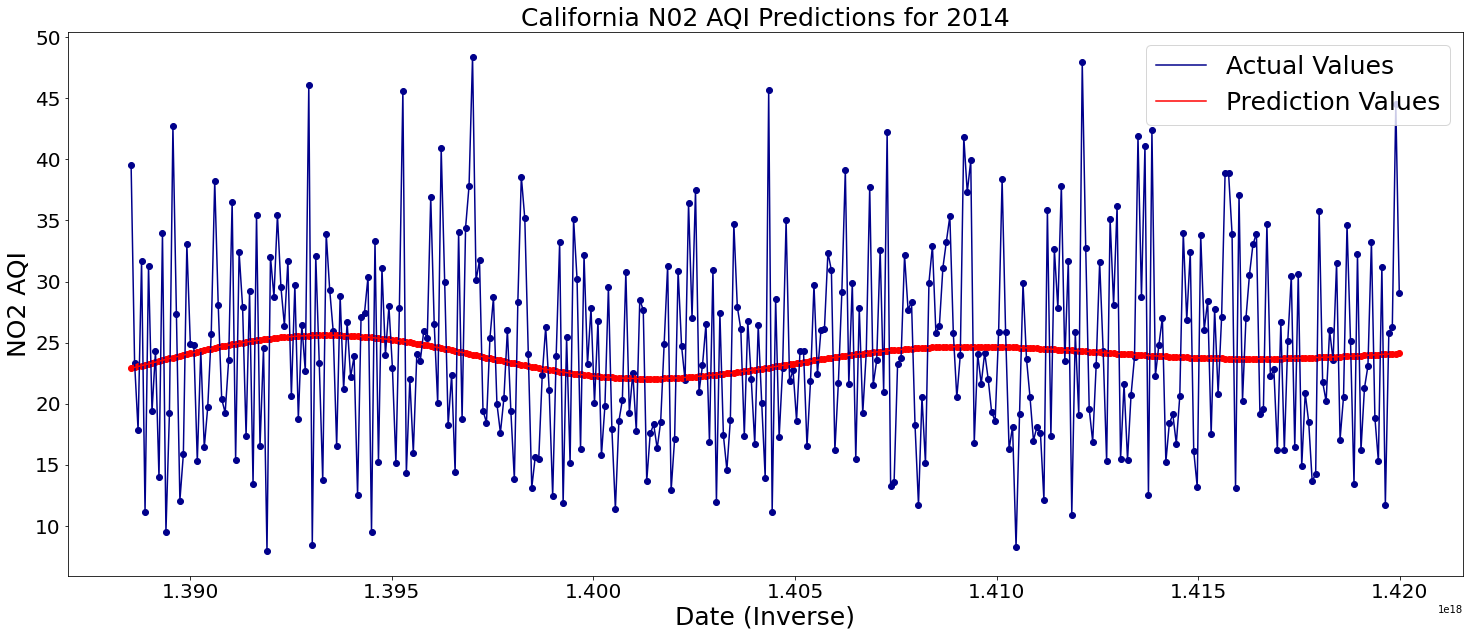

In [76]:
warnings.filterwarnings('ignore')

Selected = "California"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.0713172)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' NO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### California SO2 AQI <a class="anchor" id="California3.1">

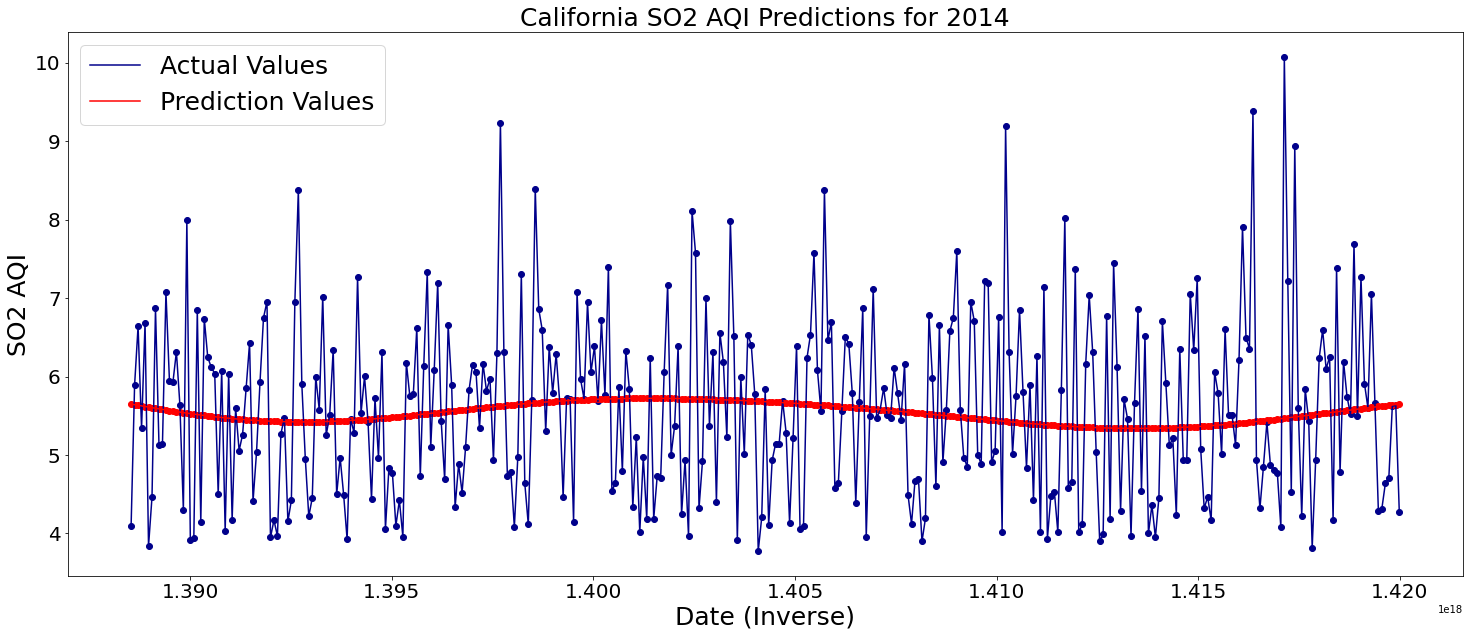

In [125]:
warnings.filterwarnings('ignore')

Selected = "California"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.0713172)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### California CO AQI <a class="anchor" id="California3.2">

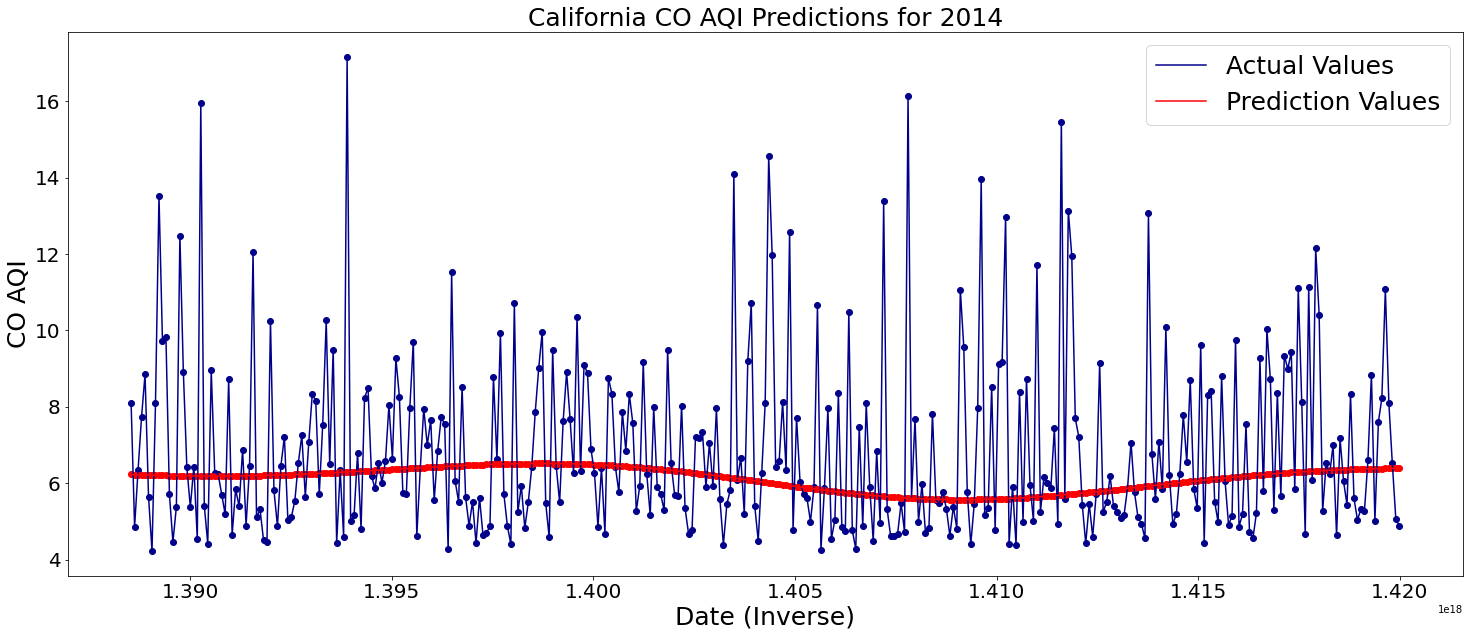

In [126]:
warnings.filterwarnings('ignore')

Selected = "California"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.0713172)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia NO2 AQI <a class="anchor" id="Georgia3">

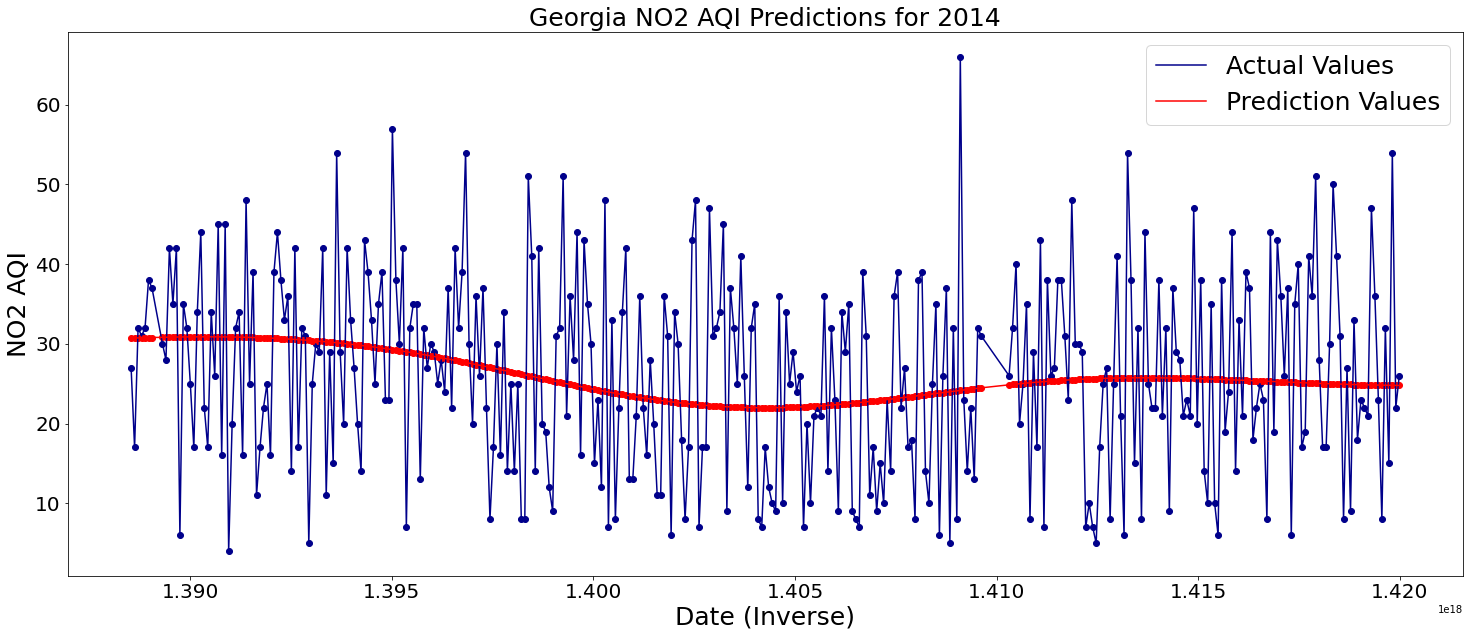

In [131]:
warnings.filterwarnings('ignore')

Selected = "Georgia"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.30531)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' NO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia SO2 AQI <a class="anchor" id="Georgia3.1">

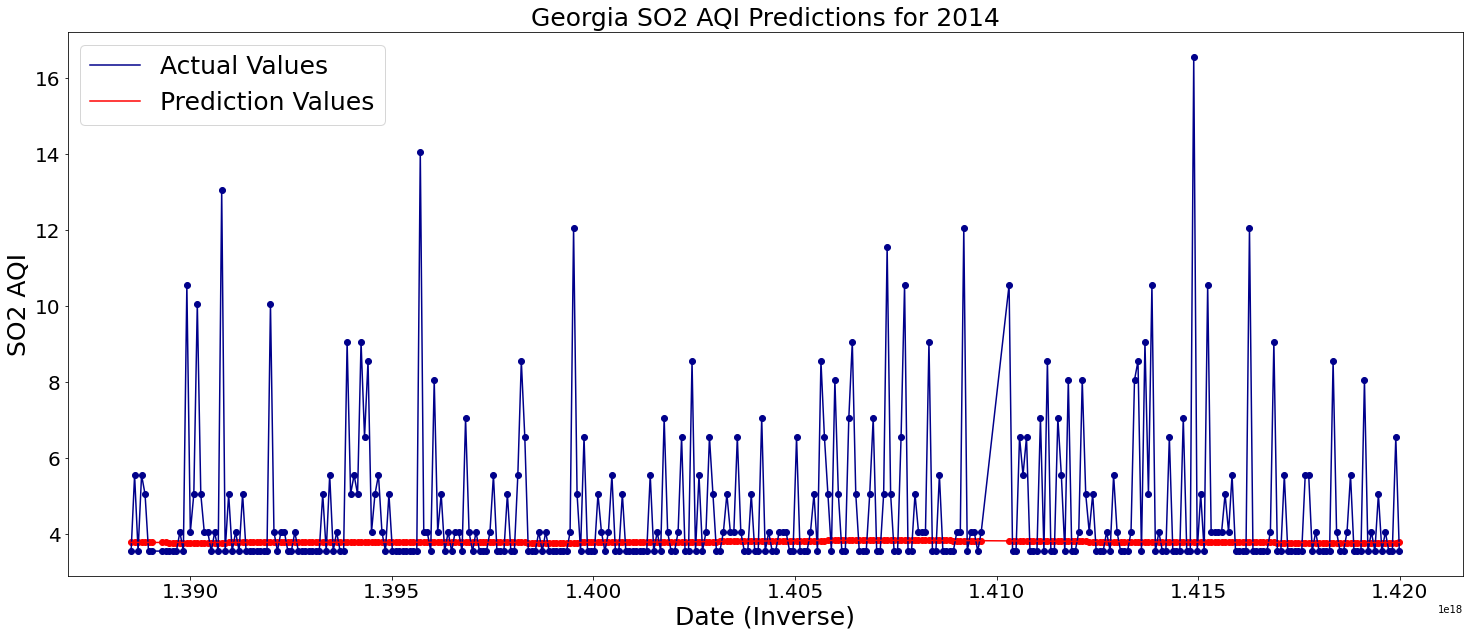

In [143]:
warnings.filterwarnings('ignore')

Selected = "Georgia"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.30531)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia CO AQI <a class="anchor" id="Georgia3.2">

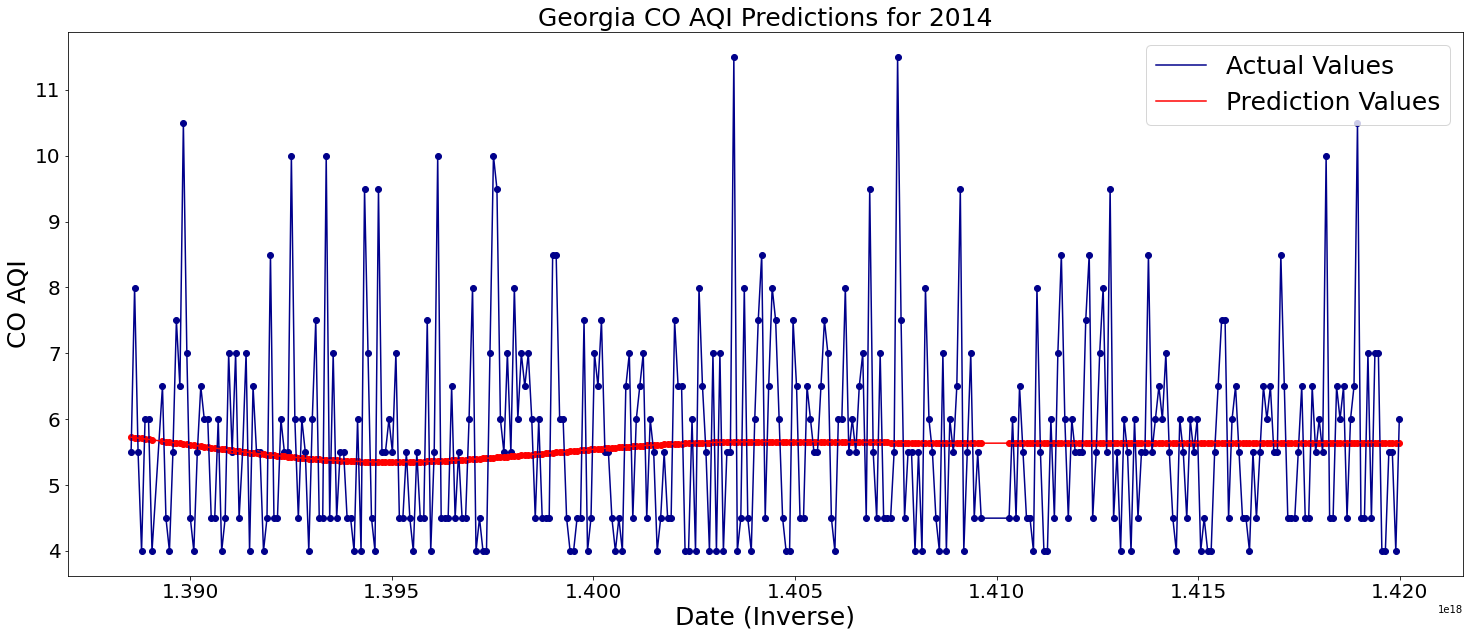

In [153]:
warnings.filterwarnings('ignore')

Selected = "Georgia"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.30531)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas NO2 AQI <a class="anchor" id="Kansas3">

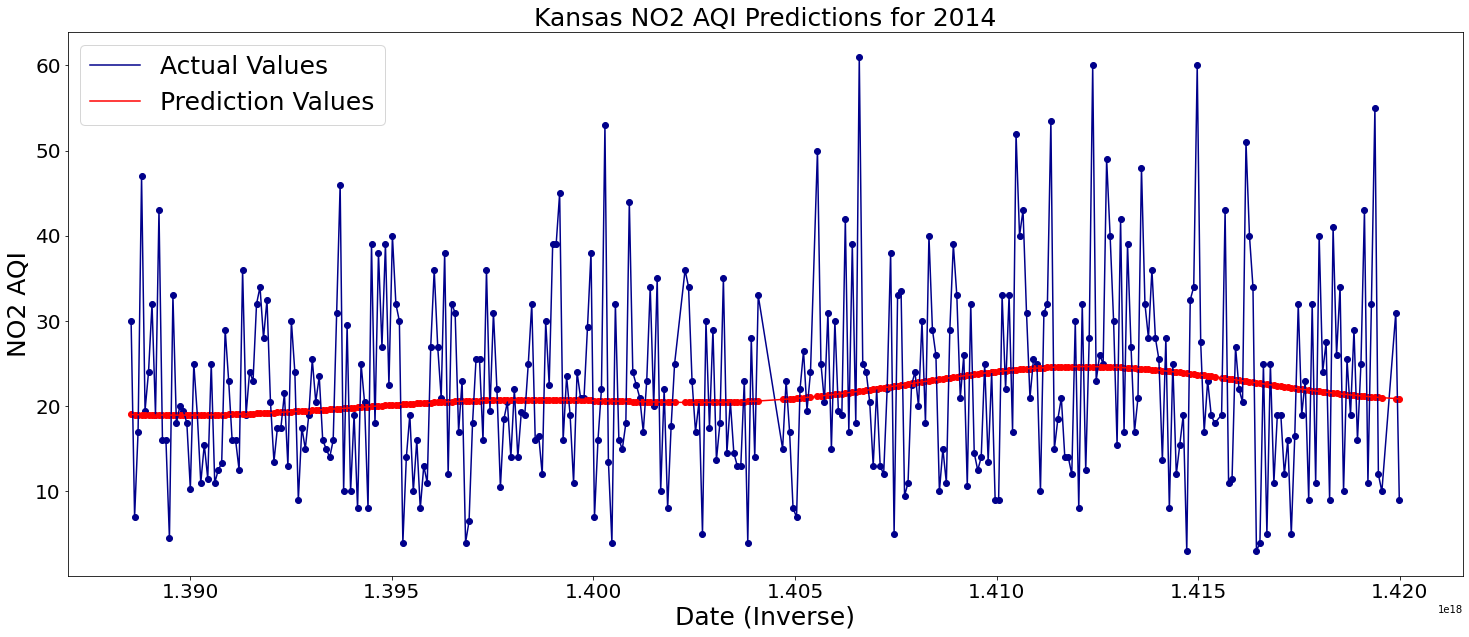

In [137]:
warnings.filterwarnings('ignore')

Selected = "Kansas"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07148)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' NO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas SO2 AQI <a class="anchor" id="Kansas3.1">

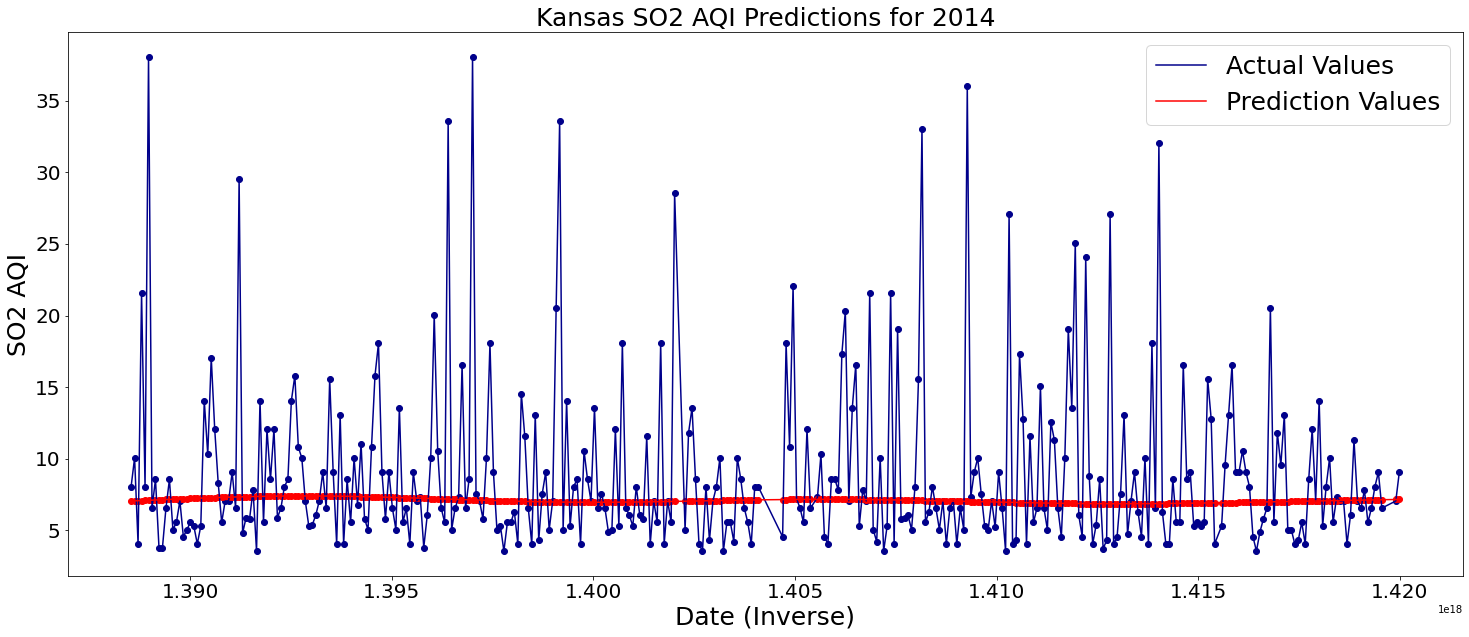

In [156]:
warnings.filterwarnings('ignore')

Selected = "Kansas"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07148)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas CO AQI <a class="anchor" id="Kansas3.2">

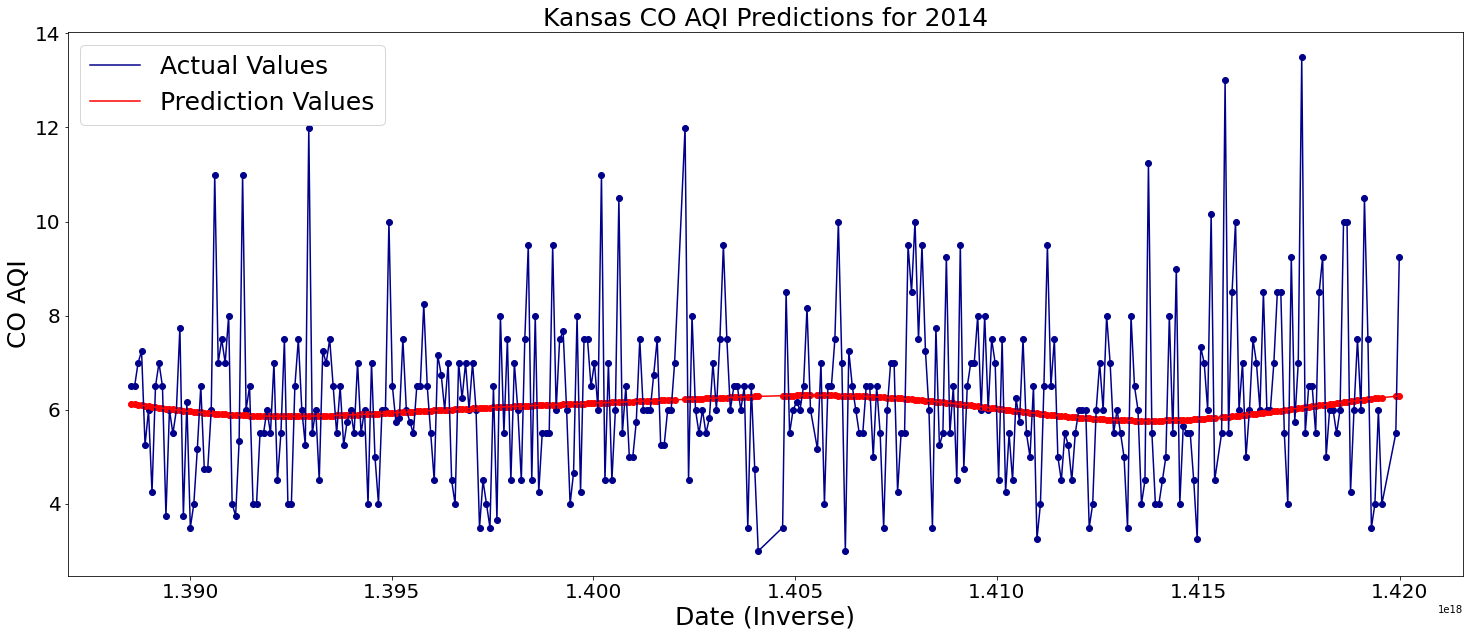

In [158]:
warnings.filterwarnings('ignore')

Selected = "Kansas"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07148)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York NO2 AQI<a class="anchor" id="NewYork3">

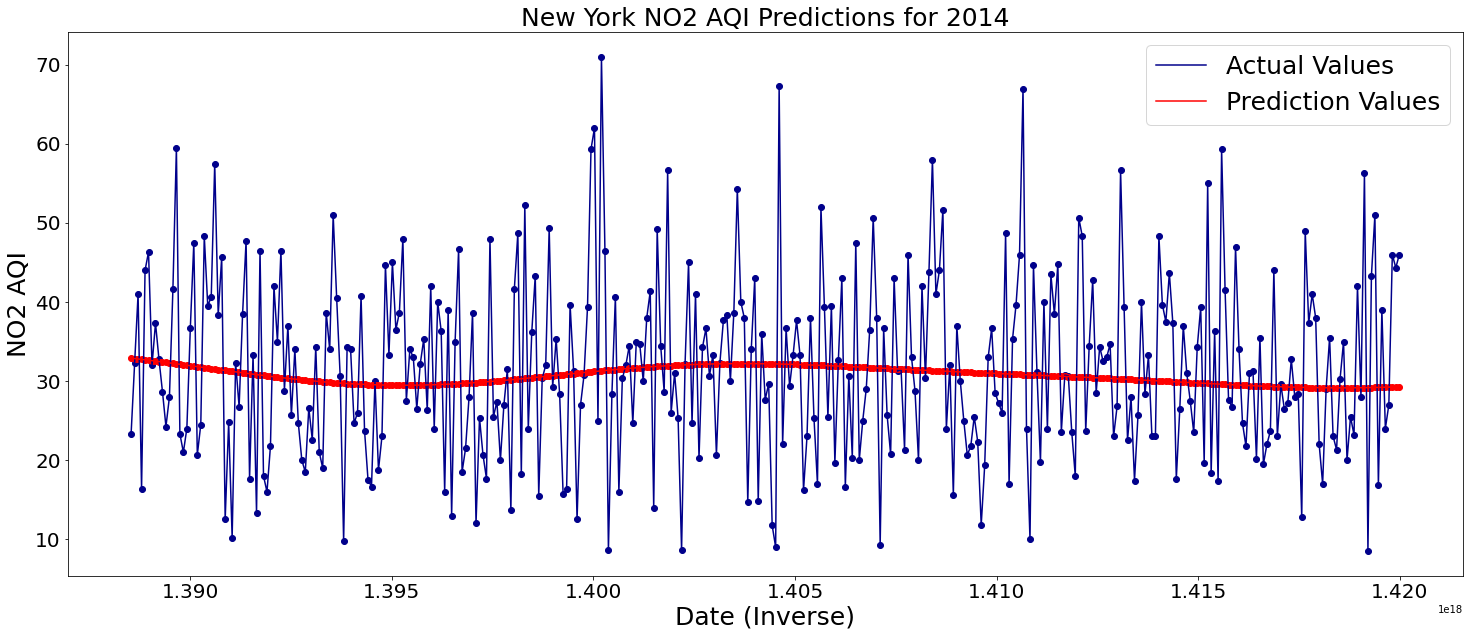

In [151]:
warnings.filterwarnings('ignore')

Selected = "New York"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07137)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' NO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York SO2 AQI<a class="anchor" id="NewYork3.1">

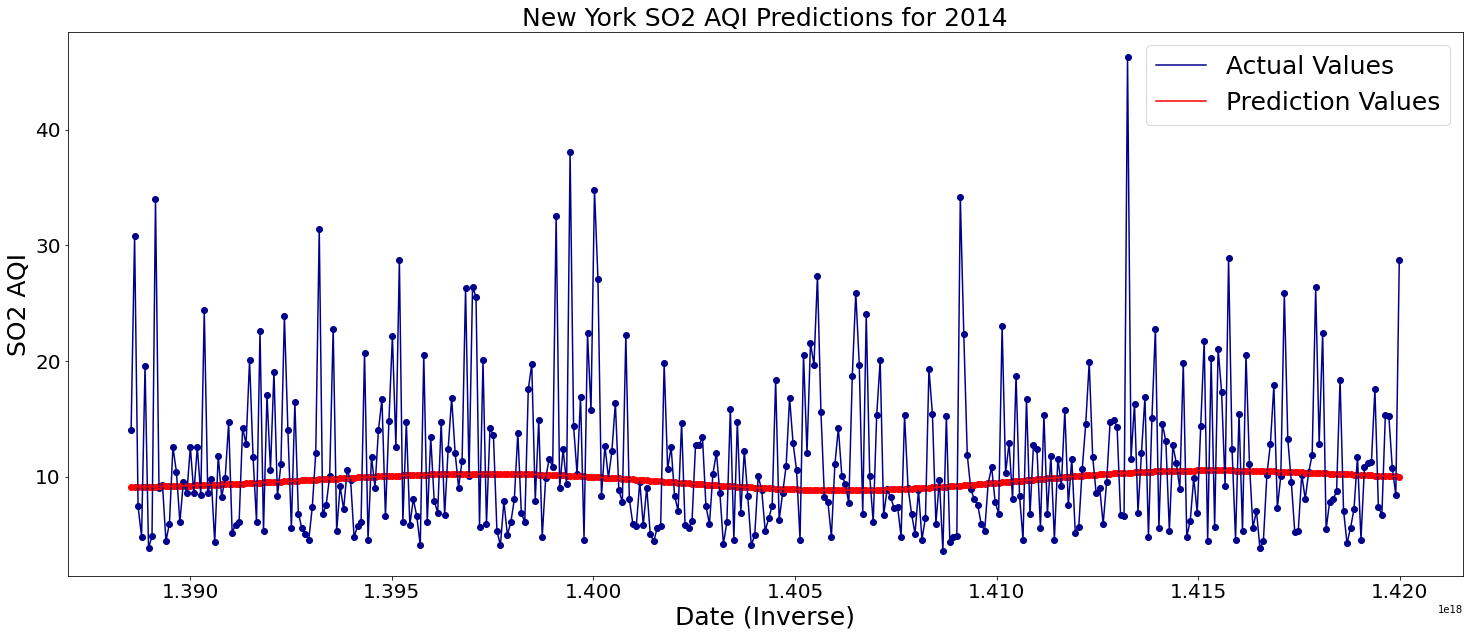

In [165]:
warnings.filterwarnings('ignore')

Selected = "New York"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07137)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York CO AQI<a class="anchor" id="NewYork3.2">

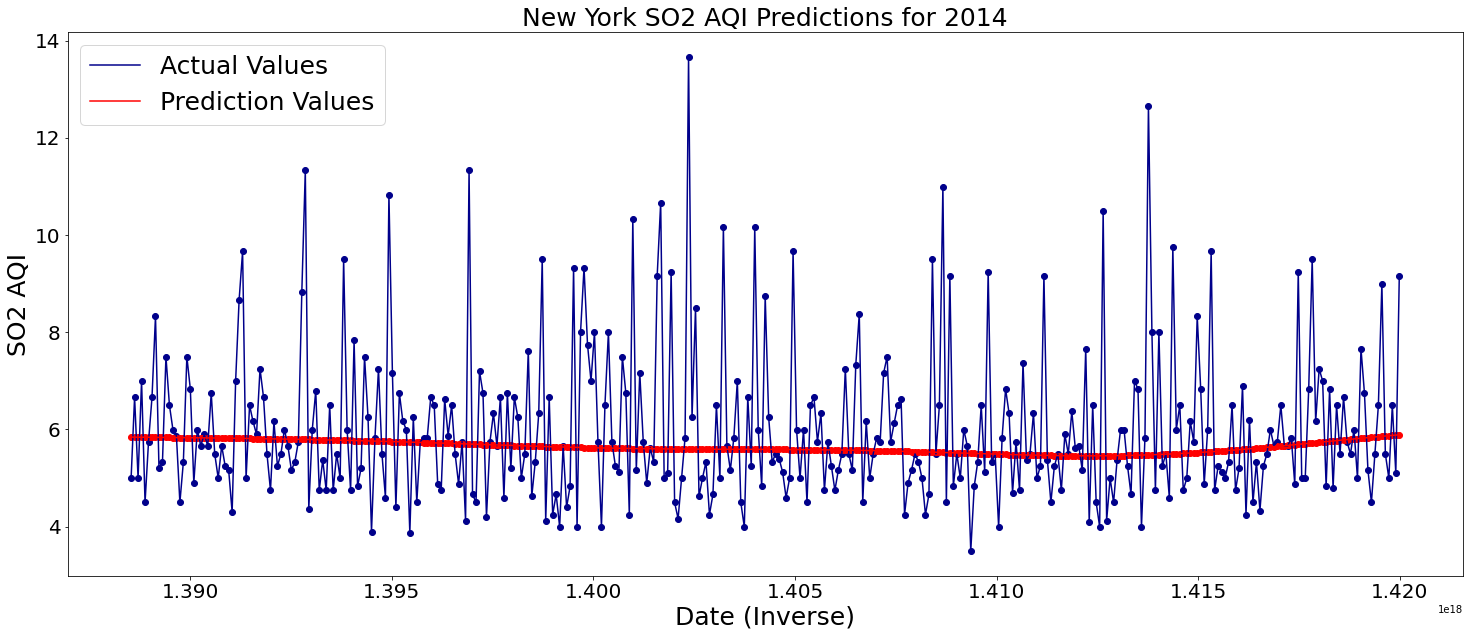

In [166]:
warnings.filterwarnings('ignore')

Selected = "New York"

State = allYears['State'] == Selected
State = allYears[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()

Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


State = year14['State'] == Selected
State = year14[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State
Monthly['Date Local'] = pd.to_datetime(Monthly['Date Local'])

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07137)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Monthly <a class="anchor" id="Monthly2">
<p>In this section predictions were made to see what the monthly AQI levlels will be in 2014.</p>

#### California NO2 AQI<a class="anchor" id="California4">

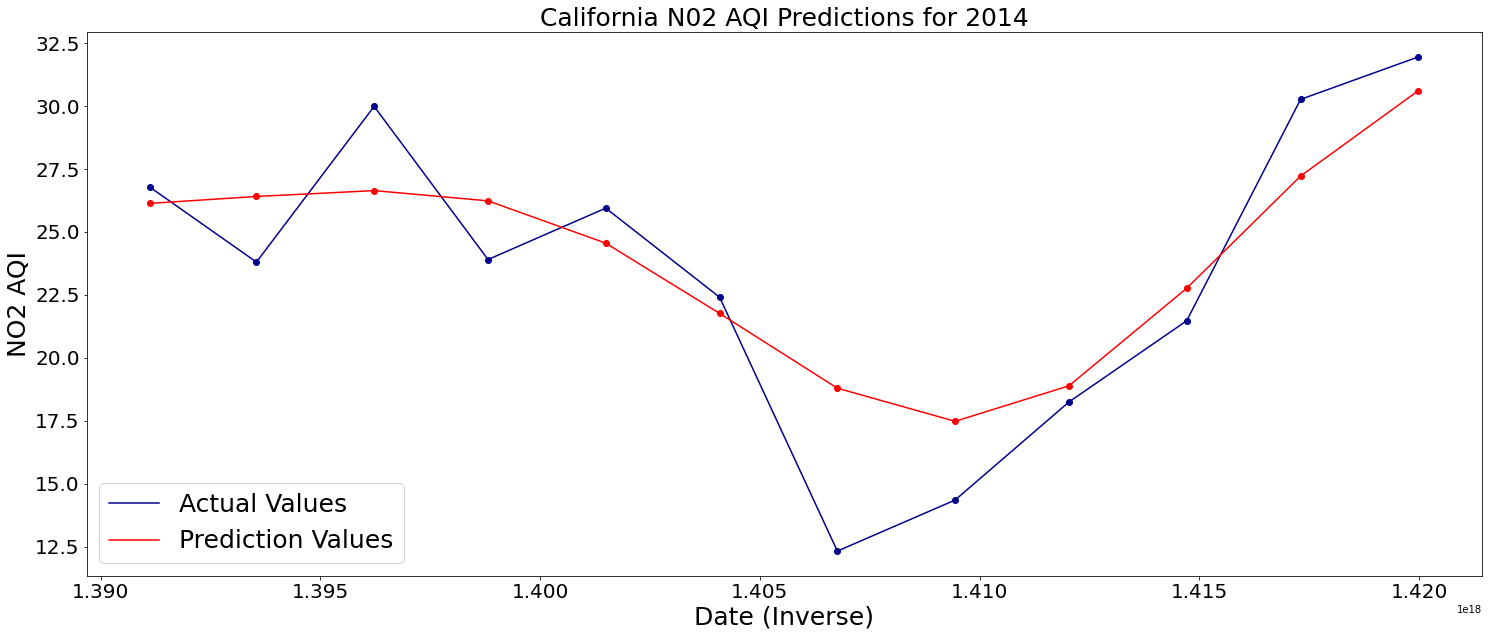

In [71]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "California"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07142)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' NO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### California SO2 AQ<a class="anchor" id="California4.1">

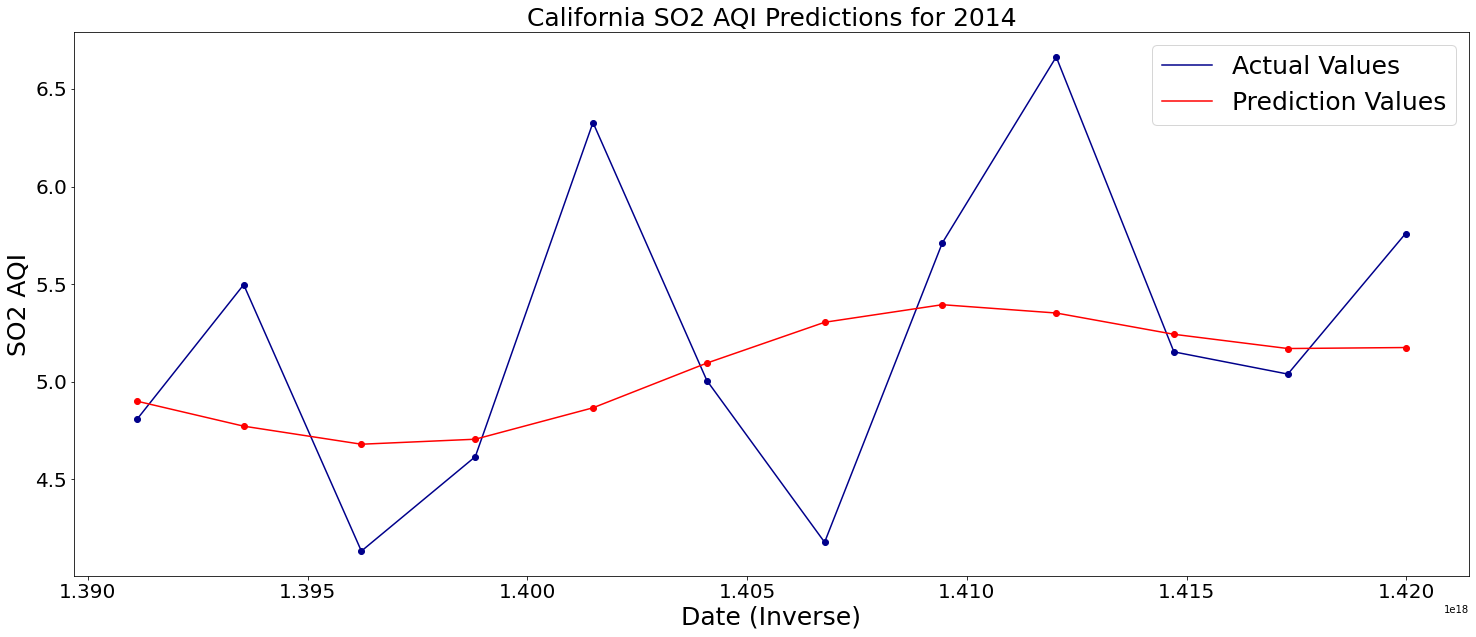

In [174]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "California"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07142)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### California CO AQI<a class="anchor" id="California4.2">

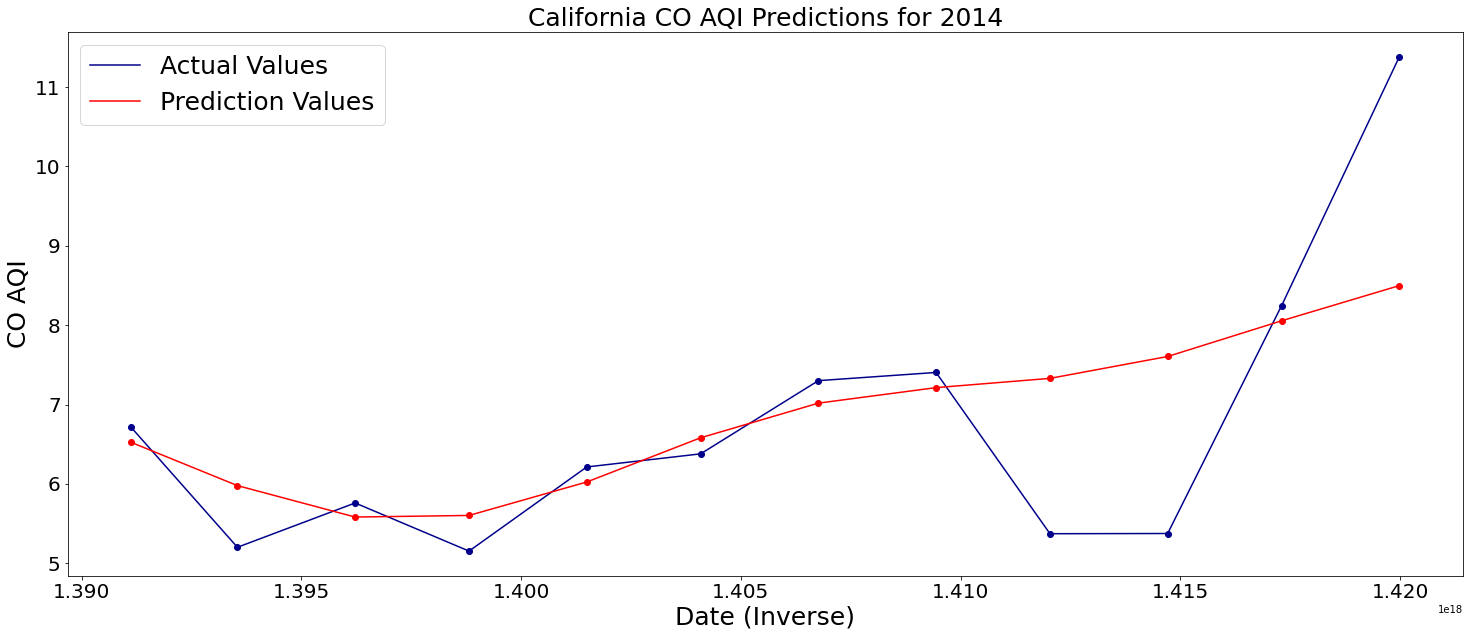

In [178]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "California"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07142)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia NO2 AQI<a class="anchor" id="Georgia4">

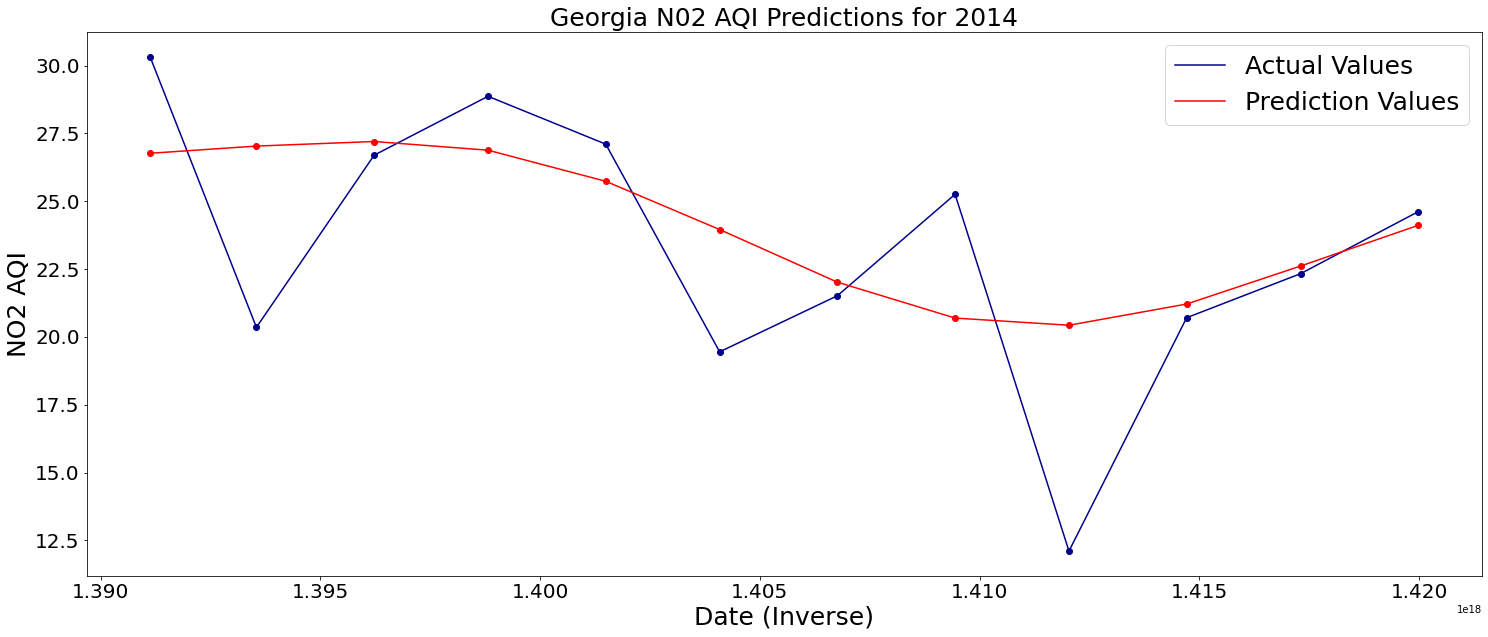

In [173]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Georgia"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.30769)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' NO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia SO2 AQI<a class="anchor" id="Georgia4.1">

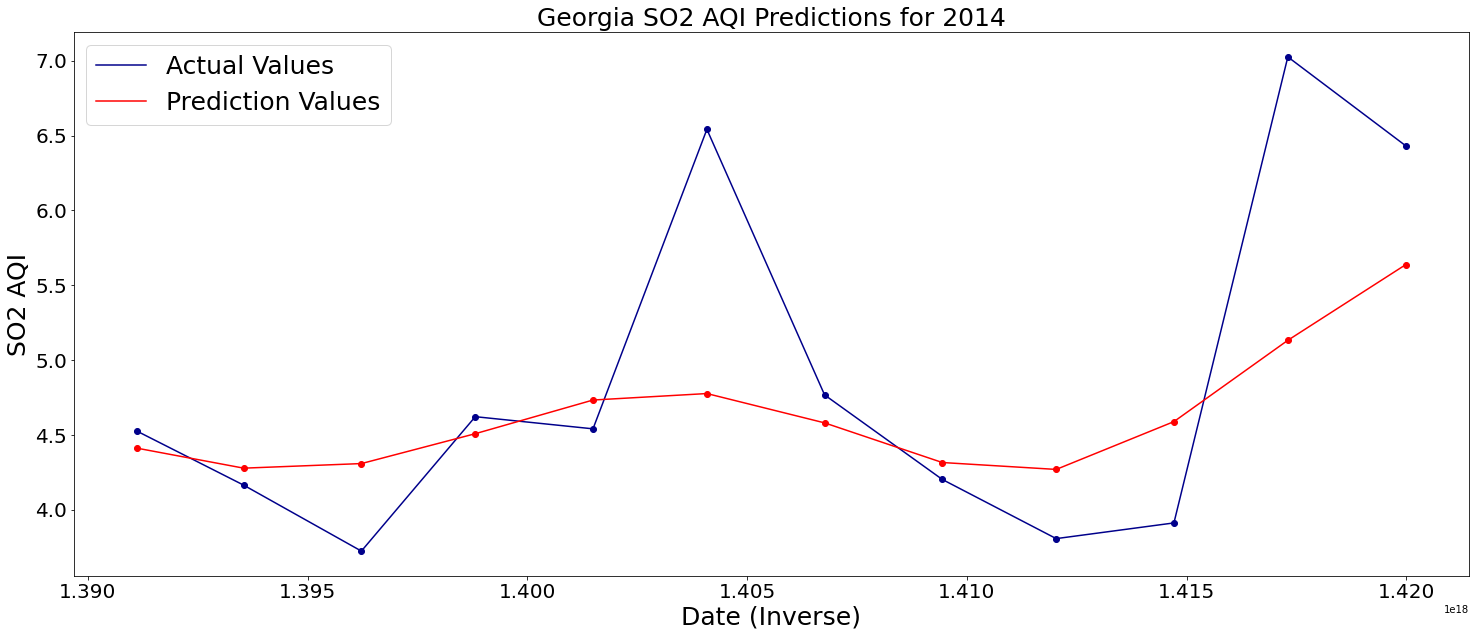

In [177]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Georgia"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.30769)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Georgia CO AQI<a class="anchor" id="Georgia4.2">

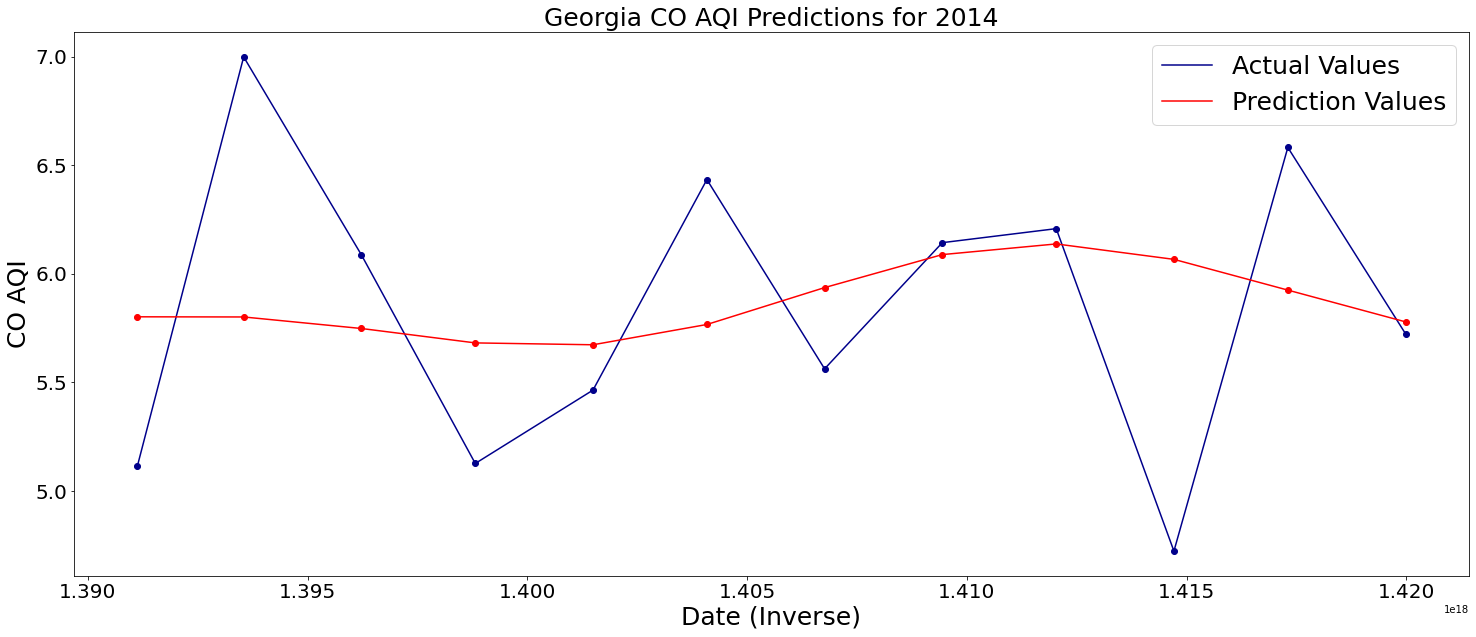

In [182]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Georgia"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.30769)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas NO2 AQI<a class="anchor" id="Kansas4">

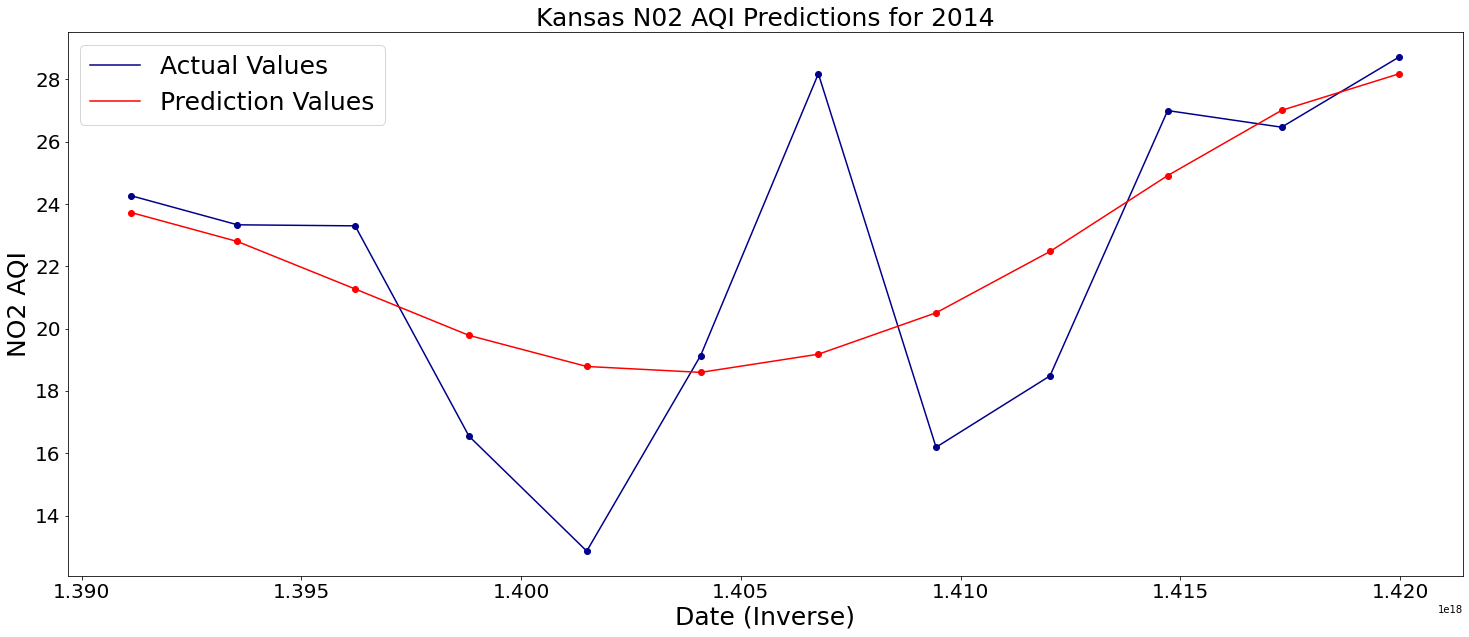

In [168]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Kansas"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07142)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' NO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas SO2 AQI<a class="anchor" id="Kansas4.1">

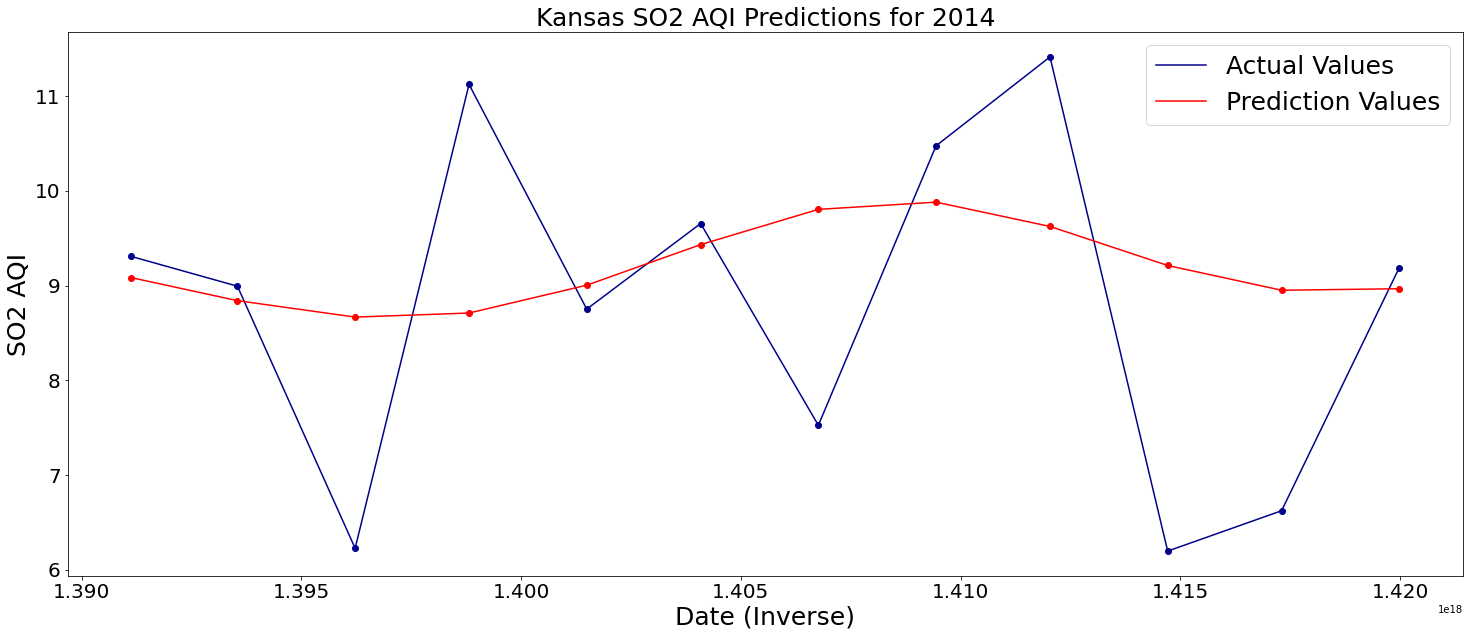

In [175]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Kansas"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07142)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Kansas CO AQI<a class="anchor" id="Kansas4.2">

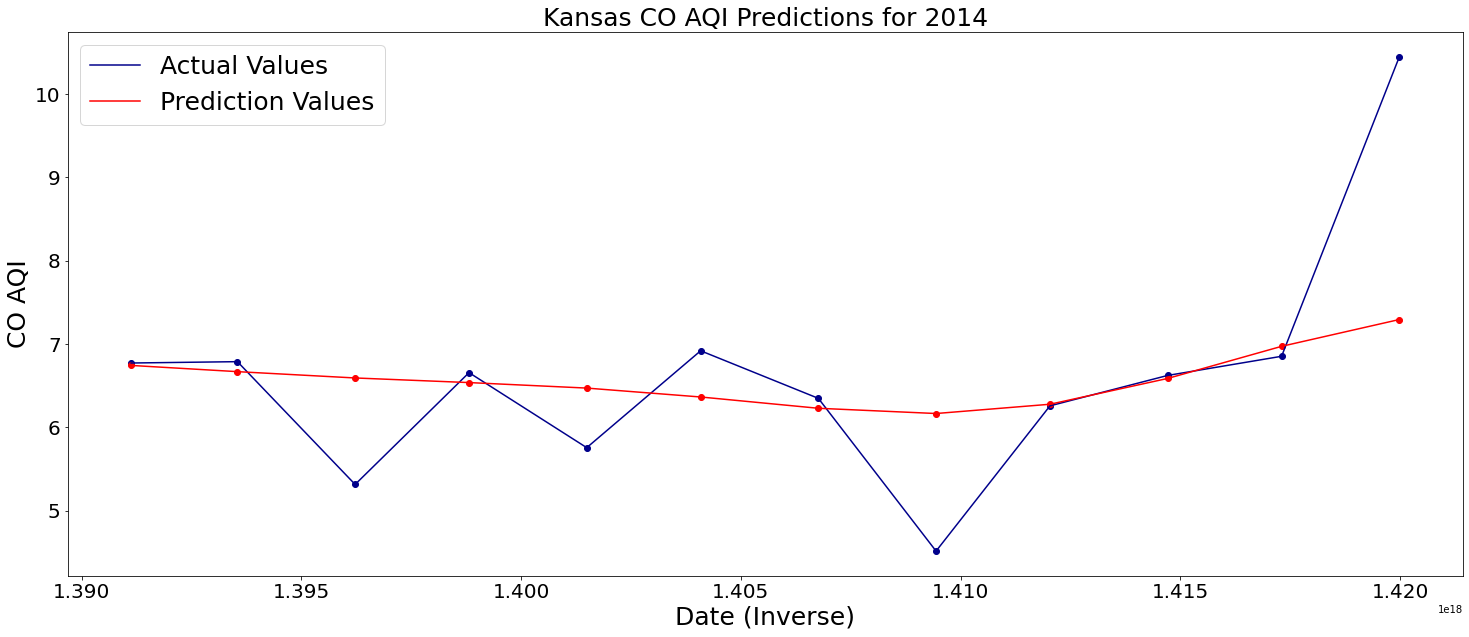

In [179]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "Kansas"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07142)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York NO2 AQI<a class="anchor" id="NewYork4">

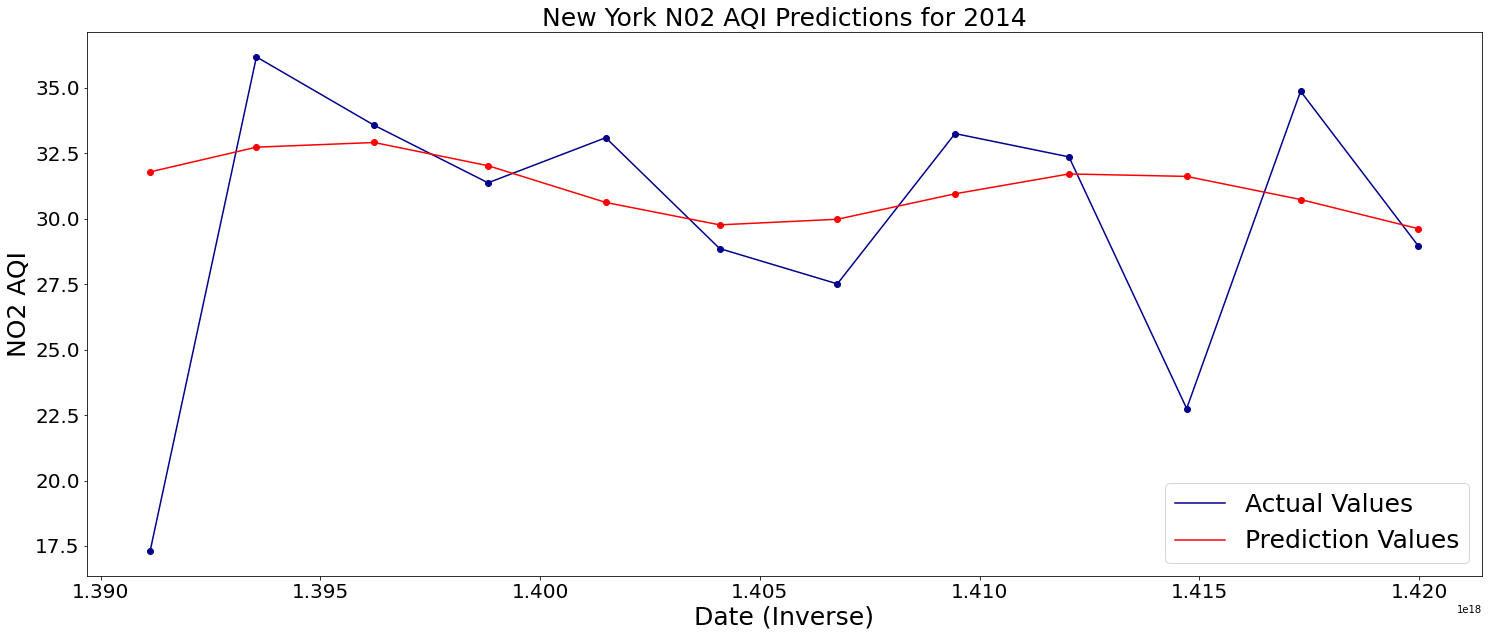

In [169]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "New York"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,1].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07142)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' NO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York SO2 AQI<a class="anchor" id="NewYork4.1">

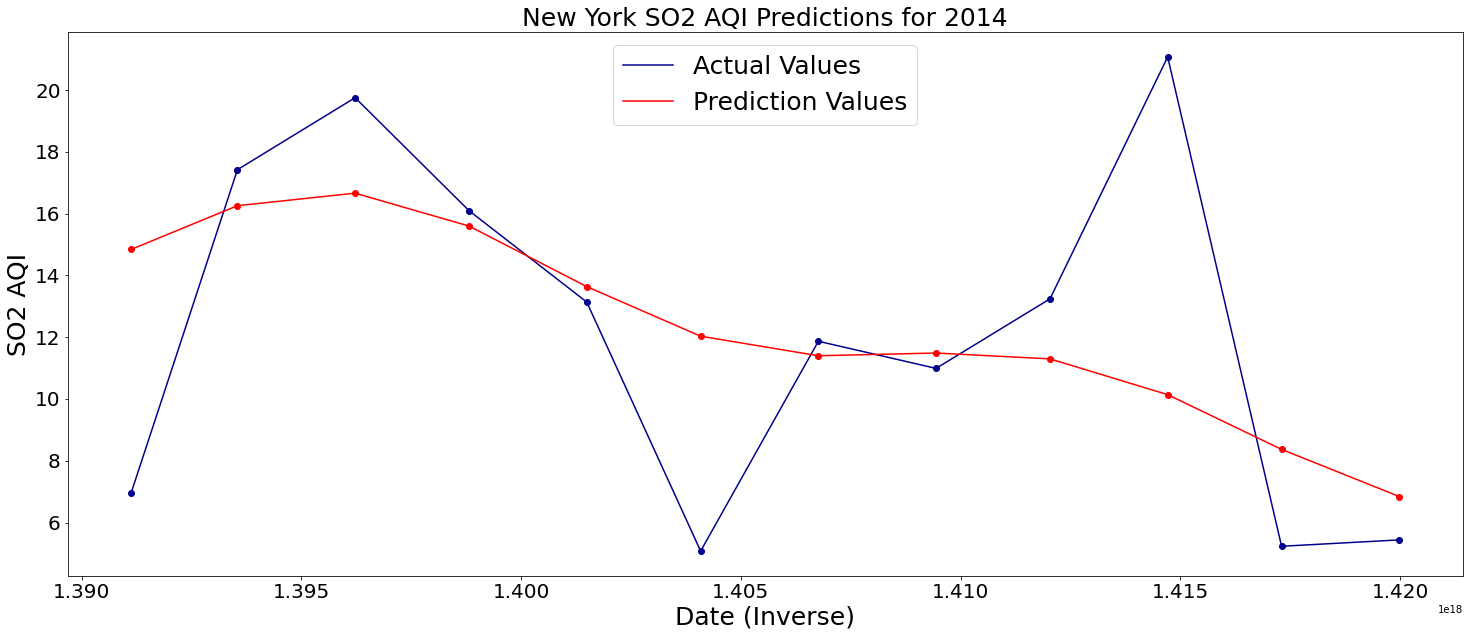

In [176]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "New York"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,2].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07142)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' SO2 AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('SO2 AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### New York CO AQI<a class="anchor" id="NewYork4.2">

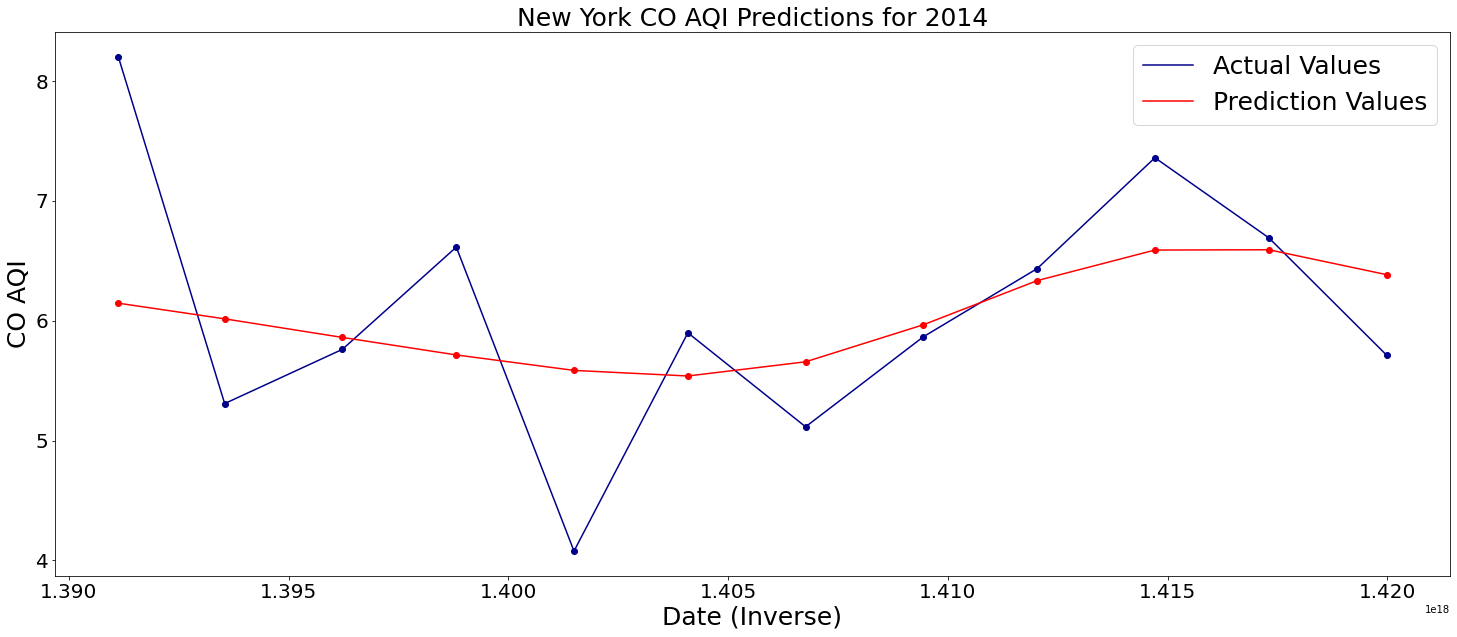

In [181]:
#This gets rid of unecessary warnings.
warnings.filterwarnings('ignore')

#The state of Califronis is selected
Selected = "New York"

#All the data for that state is saved into a variable
State = allYears['State'] == Selected
State = allYears[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

X = Monthly.iloc[:,0].values
y = Monthly.iloc[:,3].values
y = np.array(y).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


#All the data for that state is saved into a variable
State = year14['State'] == Selected
State = year14[State]

#Data is sepereated into months by getting the average for each month.
State['Date Local'] =  pd.to_datetime(State['Date Local'])
State.set_index('Date Local', inplace=True)
State.index = pd.to_datetime(State.index)
Monthly=State.resample('1M').mean().reset_index()

z = Monthly.iloc[:,0].values
sc_z = StandardScaler()

y_train, y_test = train_test_split(y,test_size=0.07142)
regressor = SVR(kernel = 'rbf')

z = sc_z.fit_transform(z.reshape(-1,1))
regressor.fit(z.reshape(-1,1),y_test.reshape(-1,1))

z_pred = regressor.predict(z)

z_pred2 = sc_y.inverse_transform(z_pred)
z_pred = z_pred2.reshape(-1,1)

z_grid = np.arange(min(z),max(z),0.1)
z_grid = z_grid.reshape((len(z_grid),1))

plt.figure(figsize=(25,10))
plt.scatter(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue')
plt.scatter(sc_z.inverse_transform(z),z_pred2,color='red')

plt.plot(sc_z.inverse_transform(z),sc_y.inverse_transform(y_test.reshape(-1)),color='darkblue',label="Actual Values")
plt.plot(sc_z.inverse_transform(z),z_pred2,color="red",label="Prediction Values")

plt.title(Selected + ' CO AQI Predictions for 2014', fontsize=25)
plt.legend(prop={'size':25})
plt.xlabel('Date (Inverse)',fontsize=25)
plt.ylabel('CO AQI',fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

## Conclusion <a class="anchor" id="Conclusion"></a>
<p></p>

## References <a class="anchor" id="References"></a>
####  [1] Stack Abuse. n.d. Relative vs Absolute Imports in Python. [online] Available at: <https://stackabuse.com/relative-vs-absolute-imports-in-python/> [Accessed 3 February 2021].
####  [2] So, B., 2016. U.S. Pollution Data. [online] Kaggle.com. Available at: <https://www.kaggle.com/sogun3/uspollution> [Accessed 3 February 2021].
#### [3] Pandas.pydata.org. n.d. pandas.DataFrame.drop — pandas 1.2.1 documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html> [Accessed 3 February 2021].
#### [4] Rai, A., 2019. Working with Missing Data in Pandas - GeeksforGeeks. [online] GeeksforGeeks. Available at: <https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/> [Accessed 3 February 2021].